This notebook aims to explore time series concepts in data analysis and time series forecasting. During this investigation, we will use **Darts** (Data Analysis and Regression Testing Sports) library  which is a powerful library for forecasting and time series analysis in Python. It stands out due to its simplicity, flexibility, and high-performance capabilities, making it a popular choice for time series forecasting tasks. Darts includes a wide range of forecasting models such as ARIMA, Exponential Smoothing State Space Models (ETS), Prophet, Theta, NBEATS, and machine learning models like Linear Regression, LightGBM, XGBoost, and more. Darts allows users to work with various types of covariates, including past, future, and static covariates, in conjunction with different forecasting models. Moreover, it suports multivatiate time series as well as multiple time series at once. 

Darts is built on top of several Python libraries including, Numpy, Pandas, Matplotlib, Stats and PyTorch. 

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Some basic concepts

## TYPES of TIME SERIES

- Univariate Time Series:

Univariate means that you are dealing with a single time series, which consists of a sequence of data points collected over time. This single time series represents the behavior or evolution of a single variable or phenomenon over time.
An example of univariate time series is daily temperature measurements for a single location over several years.

- Multivariate Time Series:

Multivariate means that you are dealing with multiple time series simultaneously. In a multivariate time series, each time series represents the behavior of a different variable or phenomenon, and these time series are observed or measured at the same time points.
An example of a multivariate time series is a dataset that includes both temperature and humidity measurements for the same location over several years. In this case, you have two time series (temperature and humidity) that are observed together.

- Deterministic Time Series:

Deterministic time series exhibit predictable and systematic patterns. The values in a deterministic time series are not random but are generated by known mathematical or deterministic relationships. These relationships can be expressed by equations or functions.
An example of a deterministic time series is a sine wave, where each data point can be computed using a trigonometric function (e.g., sine or cosine).

- Stochastic Time Series:

Stochastic time series, on the other hand, contain random or probabilistic components. The values in a stochastic time series are not strictly determined by known equations or functions. Instead, they are influenced by random factors or noise.
Most real-world time series data are stochastic because they are influenced by unpredictable events and external factors.

## STATIC COVARIATES

In general, Covariates, also known as independent variables or predictors, are variables that are used in statistical models to explain or predict the behavior of a dependent variable. They are variables that may be associated with, or potentially influence, the outcome of a statistical analysis or model.
For example, in a linear regression model predicting house prices, covariates might include square footage, number of bedrooms, location, and so on.


- Static vs. Time-Varying Covariates:

Covariates can be categorized as either static or time-varying (dynamic).
Static Covariates: These are covariates that do not change over time. In time series analysis, static covariates are typically considered as additional predictors or features that are constant for the entire duration of the time series. They do not vary with time steps.

Time-Varying (Dynamic) Covariates: These are covariates that change with time and are often used when modeling how external factors affect a time series over time. Time-varying covariates can provide valuable information for forecasting and explaining the behavior of a time series.

## TARGET and COVARIATE SERIES in DARTS

The target time series is the time series we are interested to forecast (given its history)
A covariate time series is a time series which may help in the forecasting of the target series, but that we are not interested in forecasting. It’s sometimes also called external data.

## FUTURE and PAST COVARIANTS in DARTS
Past covariates are time series whose past values are known at prediction time. Those series often contain values that have to be observed to be known.

Future covariates are time series whose future values are known at prediction time. More precisely, for a prediction made at time t for a forecast horizon n, the values at times t+1, …, t+n are known. Often, the past values (for times t-k, t-k+1, …, t for some lookback window k) of future covariates are known as well. Future covariates series contain for instance calendar informations or weather forecasts.

## DENOISING

Denoising in time series data refers to the process of removing or reducing noise or unwanted variations in a time series signal to reveal the underlying patterns, trends, or signals of interest. Noise in time series data can manifest as random fluctuations, outliers, or irregular patterns that make it difficult to identify meaningful information or analyze the data effectively. The goal of denoising is to improve the signal-to-noise ratio and make the data more interpretable and suitable for analysis or forecasting.Common approaches to denoising time series data include:

- MOVING AVERAGE

    - Simple Moving Average (SMA): Calculate the average of data points within a fixed window to smooth out fluctuations. SMA helps remove high-frequency noise but may introduce lag in capturing trends.

    - Exponential Moving Average (EMA): Assign exponentially decreasing weights to data points within a window. EMA gives more weight to recent data, making it responsive to changes while still smoothing the data.

- Frequency Domain Methods:

    - Fourier Transform: Convert the time domain signal into the frequency domain to identify and filter out specific frequencies associated with noise.
    - Spectral Analysis: Analyze the power spectrum to identify dominant frequencies and remove noise components.

- Filtering Techniques:

    - Low-Pass Filters: These filters allow low-frequency components (e.g., trends) to pass while attenuating high-frequency noise. Common low-pass filters include the - Butterworth filter and the Savitzky-Golay filter.
    - Wavelet Transform: Wavelet-based denoising decomposes the time series into different scales and removes noise at each scale.




# Load time series

There are several ways that we can load time series in Darts and in following we will explore some of them.

## Toy dataset

In [9]:
from darts.datasets import AirPassengersDataset
series = AirPassengersDataset().load()
series.columns

Index(['#Passengers'], dtype='object', name='component')

## Random walk time series

A random walk time series is a stochastic or probabilistic time series model commonly used in various fields, including finance, economics, and statistics. It represents a sequence of data points where each point is the result of adding a random "shock" or "innovation" to the previous data point. The idea behind a random walk is that each new value is influenced by the previous value and a random element.

Here's how a simple random walk time series can be defined mathematically:

The first value in the series, denoted as Y(0), is typically set to some initial value.

Each subsequent value Y(t) in the series is calculated as follows:

Y(t) = Y(t-1) + ε(t)

- Y(t) is the value at time t.
- Y(t-1) is the value at time t-1 (the previous value).
- ε(t) is a random shock or innovation at time t. This is often assumed to be a random variable following a specific distribution, such as a normal distribution with mean zero and a fixed standard deviation.


The key characteristics of a random walk time series are as follows:

Trend: A random walk can exhibit a trend because each new value is influenced by the previous value. If the random shocks are predominantly positive or negative, the series can drift upwards or downwards over time.

No Seasonality: Random walk time series typically do not exhibit seasonality. Seasonality refers to patterns that repeat at regular intervals, and random walks are by definition unpredictable at each step.

Non-Stationary: Random walk time series are non-stationary because they do not have a constant mean or variance over time.

Difficult to Forecast: Forecasting a random walk is challenging because it is inherently unpredictable. The best forecast for the next value in a random walk is simply the current value.

Random walk time series are often used as a benchmark or null model in time series analysis. They serve as a baseline to compare the forecasting performance of more sophisticated models. If a forecasting model cannot outperform a simple random walk, it may not be providing useful predictions for the data in question.

In financial markets, stock prices are sometimes modeled as random walks, with the idea that changes in stock prices are influenced by new information and random market events. However, it's important to note that while random walks provide a simple starting point for modeling, real-world financial time series can exhibit additional complexities and patterns that go beyond a basic random walk model.

**Stationary time series**

Stationary time series are time series data in which statistical properties, such as the mean, variance, and autocorrelation, remain constant or do not change over time. In other words, a stationary time series is one that does not exhibit any significant trends, seasonality, or other systematic patterns that evolve with time. Stationarity is an important concept in time series analysis because many time series forecasting models and statistical tests assume or work better with stationary data.

There are two main types of stationarity:

- Strict Stationarity (Strong Stationarity):

In a strictly stationary time series, the joint probability distribution of any set of data points (i.e., subseries) is invariant over time. This means that the statistical properties of the time series, such as the mean and variance, do not change with time.
Formally, a time series Y(t) is strictly stationary if, for any set of time points t1, t2, ..., tn and for any integer k, the joint probability distribution of Y(t1), Y(t2), ..., Y(tn) is the same as the joint distribution of Y(t1+k), Y(t2+k), ..., Y(tn+k).

- Weak Stationarity (Second-Order Stationarity):

Weak stationarity relaxes the strict stationarity assumption slightly. In a weakly stationary time series, the mean, variance, and autocovariance function (or autocorrelation function) remain constant over time, but the joint distribution of the data points may not necessarily be invariant.
Formally, a time series Y(t) is weakly stationary if:
The mean E[Y(t)] is constant and does not depend on time t.
The variance Var[Y(t)] is constant and does not depend on time t.
The autocovariance function Cov[Y(t), Y(t+h)] depends only on the time lag h and does not depend on the specific time t.
Stationarity is important in time series analysis because many time series forecasting models, such as ARIMA (AutoRegressive Integrated Moving Average), assume stationarity to make meaningful predictions. When a time series is not stationary, it may need to be transformed (e.g., differenced) to achieve stationarity before applying such models.

<AxesSubplot: xlabel='time'>

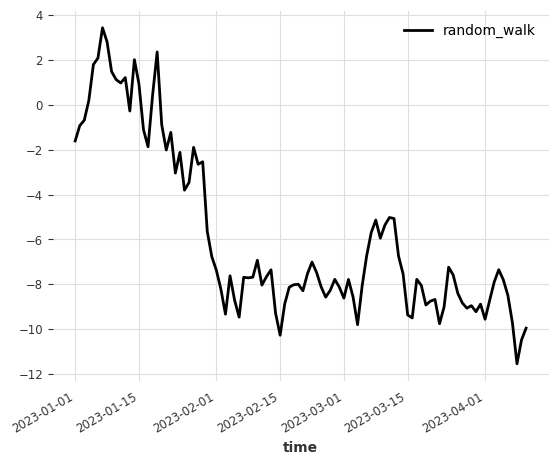

In [10]:
from darts.utils.timeseries_generation import random_walk_timeseries

# Generate a random walk time series for demonstration

random_walk_series = random_walk_timeseries(length=100, start = pd.Timestamp("2023-01-01"))

random_walk_series.plot()


In [11]:
values1 = random_walk_series.values()
print(sum(values1 ==0))
print(values1.shape)
values1[random_walk_series.values()<0] =0
sum(values1 ==0)

[0]
(100, 1)


array([87])

In [312]:
random_walk_series.time_index

DatetimeIndex(['2023-01-01', '2023-01-02', '2023-01-03', '2023-01-04',
               '2023-01-05', '2023-01-06', '2023-01-07', '2023-01-08',
               '2023-01-09', '2023-01-10', '2023-01-11', '2023-01-12',
               '2023-01-13', '2023-01-14', '2023-01-15', '2023-01-16',
               '2023-01-17', '2023-01-18', '2023-01-19', '2023-01-20',
               '2023-01-21', '2023-01-22', '2023-01-23', '2023-01-24',
               '2023-01-25', '2023-01-26', '2023-01-27', '2023-01-28',
               '2023-01-29', '2023-01-30', '2023-01-31', '2023-02-01',
               '2023-02-02', '2023-02-03', '2023-02-04', '2023-02-05',
               '2023-02-06', '2023-02-07', '2023-02-08', '2023-02-09',
               '2023-02-10', '2023-02-11', '2023-02-12', '2023-02-13',
               '2023-02-14', '2023-02-15', '2023-02-16', '2023-02-17',
               '2023-02-18', '2023-02-19', '2023-02-20', '2023-02-21',
               '2023-02-22', '2023-02-23', '2023-02-24', '2023-02-25',
      

## Constant time series

<AxesSubplot: xlabel='time'>

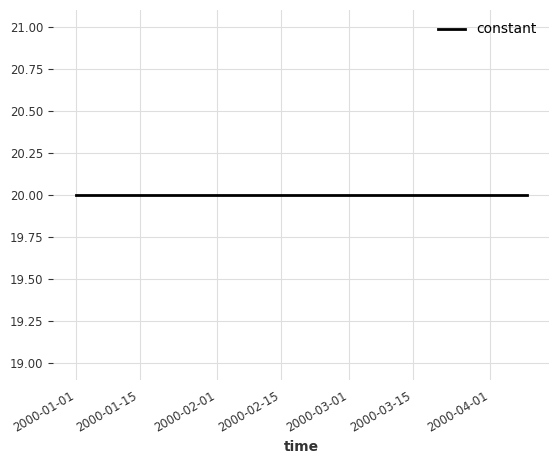

In [12]:
from darts.utils.timeseries_generation import constant_timeseries

constant_series = constant_timeseries(length=100, value =20)

constant_series.plot()

## sine time series

<AxesSubplot: xlabel='time'>

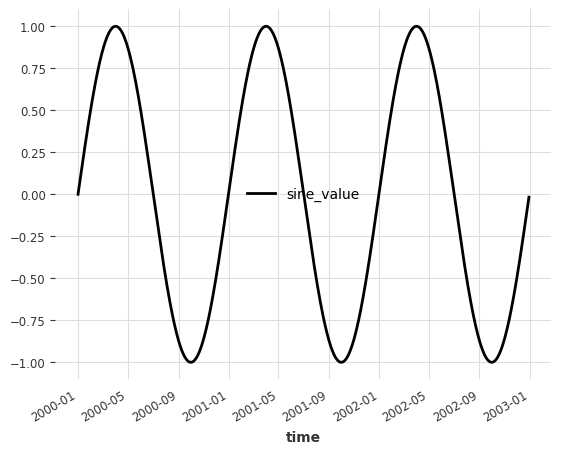

In [13]:
from darts.utils import timeseries_generation as tg

LENGTH = 3 * 365  # 3 years of daily data

sine_series = tg.sine_timeseries(length=LENGTH, 
                              value_frequency=(1/365), # every year,we will see a complete sine graph. So, within three year, we will have three sine graphs.
                              freq='D', 
                              column_name='sine_value')

sine_series.plot()

<AxesSubplot: xlabel='time'>

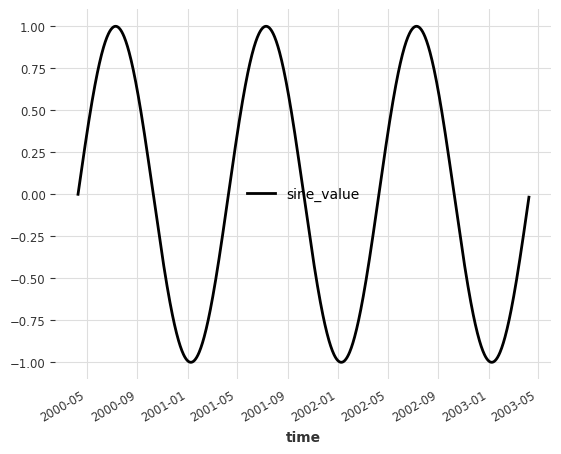

In [14]:
sine_series.shift(100).plot()

## Guassian time series

Creates a gaussian univariate TimeSeries by sampling all the series values independently, from a gaussian distribution with mean `mean` and standard deviation `std`.

<AxesSubplot: xlabel='time'>

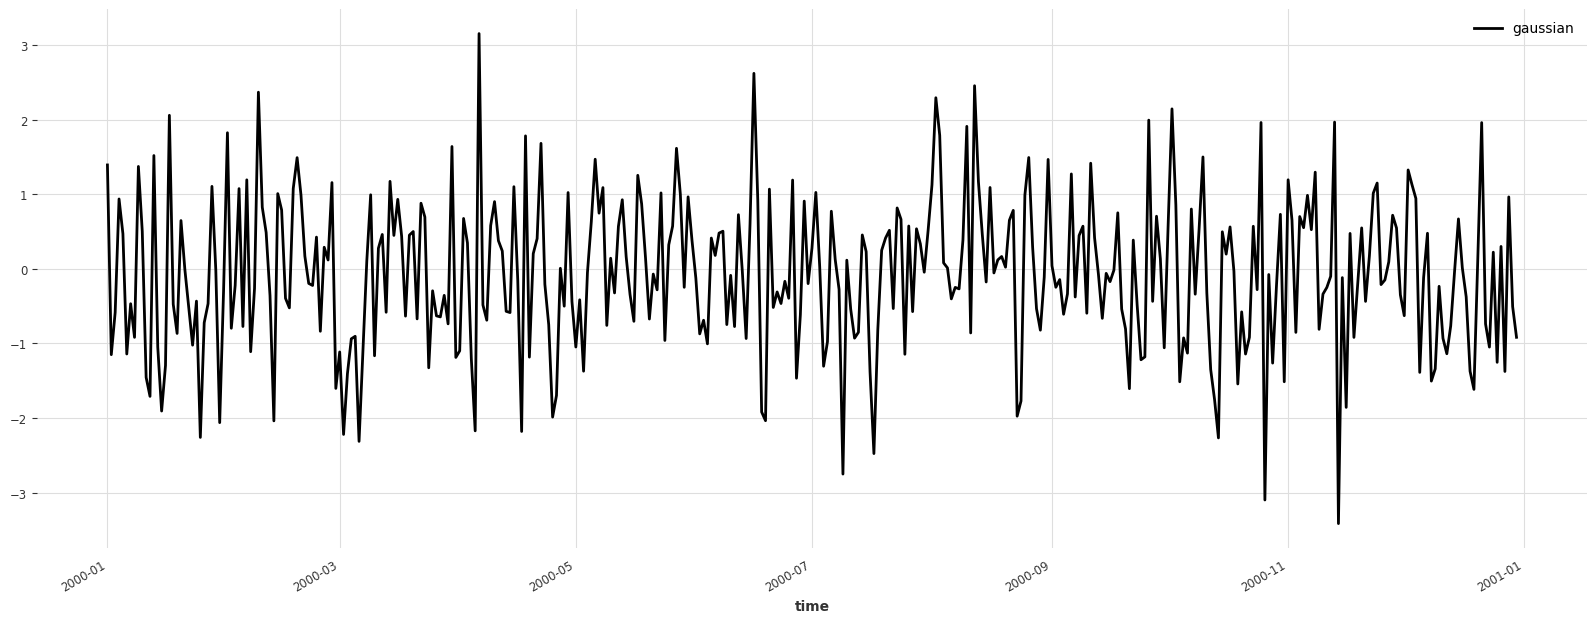

In [15]:
from darts.utils import timeseries_generation as tg
plt.figure(figsize = (20,7))


LENGTH = 365  

gaussian_series = tg.gaussian_timeseries(length=LENGTH, freq='D', mean = 0, std = 1)

gaussian_series.plot()

## Combined time series

<AxesSubplot: xlabel='time'>

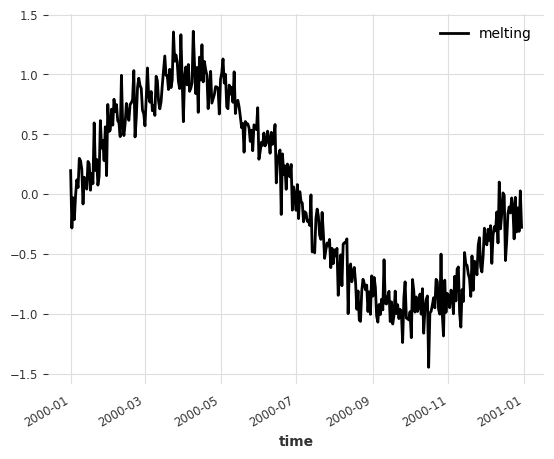

In [16]:
LENGTH = 365  

combined_series = (tg.sine_timeseries(length=LENGTH, 
                              value_frequency=(1/365), 
                              freq='D', 
                              column_name='melting')
                 + 0.15 * tg.gaussian_timeseries(length=LENGTH, freq='D'))

combined_series.plot()

## time_based series

<AxesSubplot: xlabel='time'>

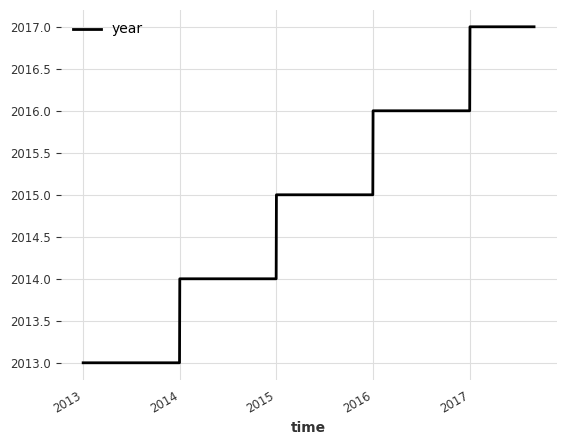

In [236]:
from darts.utils.timeseries_generation import datetime_attribute_timeseries

full_time_period = pd.date_range(start='2013-01-01', end='2017-08-31', freq='D')

# Time-Based Covariates

year_series = datetime_attribute_timeseries(time_index = full_time_period, attribute="year")

year_series.plot()

<AxesSubplot: xlabel='time'>

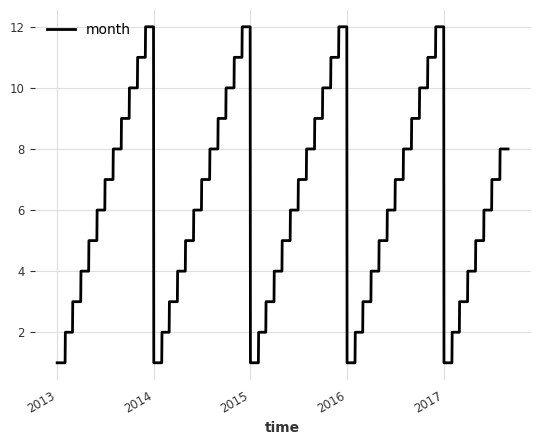

In [237]:
month_series = datetime_attribute_timeseries(time_index = full_time_period, attribute="month")
month_series.plot()

### stacking time series

In [239]:
weekofyear_series = datetime_attribute_timeseries(time_index = full_time_period, attribute="weekofyear")

time_cov = year_series.stack(month_series).stack(weekofyear_series)

time_cov.values()

array([[2.013e+03, 1.000e+00, 1.000e+00],
       [2.013e+03, 1.000e+00, 1.000e+00],
       [2.013e+03, 1.000e+00, 1.000e+00],
       ...,
       [2.017e+03, 8.000e+00, 3.500e+01],
       [2.017e+03, 8.000e+00, 3.500e+01],
       [2.017e+03, 8.000e+00, 3.500e+01]])

<AxesSubplot: xlabel='time'>

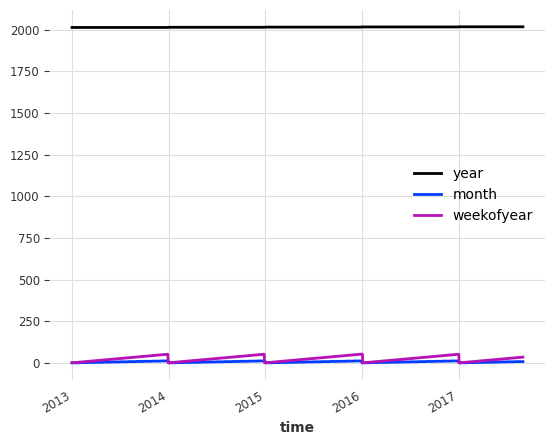

In [240]:
time_cov.plot()

## Real dataset

Darts provide a method for loading pandas dataframes contianing time column as a time series. In following, we will first load the  [Store Sales Dataset](https://www.kaggle.com/competitions/store-sales-time-series-forecasting/overview) from kaggle which contians store sales data of fromCorporación Favorita, a large Ecuadorian-based grocery retailer and then we use two useful methods of Darts.utils class to load this data.

In [ ]:
def create_final_dataframe(main_data):
    #load all aditional dataframes
    oil_data = pd.read_csv("./Data/oil.csv", parse_dates= ["date"])
    holiday_data = pd.read_csv("./Data/holidays_events.csv", parse_dates= ["date"])
    stores_data = pd.read_csv("./Data/stores.csv")
    trans_data = pd.read_csv("./Data/transactions.csv", parse_dates= ['date'])

    # preprocess dataframes: updating datatypes and filling missing values

    main_datatype = {"store_nbr": "category", "family" :"category"}
    main_data = main_data.astype(main_datatype)

    oil_data.fillna(method = "backfill", inplace = True)

    holiday_datatypes = {"type": "category","locale":"category", "locale_name": "category", "description": "string"}
    holiday_data = holiday_data.astype(holiday_datatypes)

    stores_data = stores_data.astype("category")

    # split holiday dataframe based on holiday types

    holiday_local  = holiday_data[holiday_data["locale"]== "Local"].copy()
    holiday_local.rename(columns={'locale_name': 'city'}, inplace=True)
    holiday_local= holiday_local.drop_duplicates(subset=['date', 'city'])
    holiday_regional  = holiday_data[holiday_data["locale"]== "Regional"].copy()
    holiday_regional.rename(columns={'locale_name': 'state'}, inplace=True)
    holiday_regional= holiday_regional.drop_duplicates(subset=['date', 'state'])
    holiday_national = holiday_data[holiday_data["locale"]== "National"].copy()
    holiday_national= holiday_national.drop_duplicates(subset=['date'])

    # merging all frames to create the final dataframe: 
    df = main_data.merge(oil_data, on = "date", how = "left").fillna(method = 'ffill')
    df = df.merge(stores_data, on = "store_nbr", how = "left", )
    df = df.merge(trans_data, on = ["date", "store_nbr"], how = "left")
    df = df.merge(holiday_local, on = ["date", "city"], how = "left", suffixes= ("_store", "_holiday")) 
    df = df.merge(holiday_regional, on = ["date", "state"], how = "left",)
    df = df.merge(holiday_national, on ="date", how = "left")
    
    # Filing missing values of type holiday variable in the df dataframe
    type_holiday = df['type_holiday'].combine_first(df['type_x']).combine_first(df['type_y'])
    locale = df['locale_x'].combine_first(df['locale_y']).combine_first(df['locale'])
    transferred =  df['transferred_x'].combine_first(df['transferred_y']).combine_first(df['transferred'])
    
    # create the final version of df dataframe by adding the correct columns of holiday dataframe
    df = df.iloc[:, :11]
    df['type_holiday']= type_holiday
    df['locale']= locale
    df['transferred'] = transferred

    # trim the final dataframe by improving its columns' datatypes and imputing the missing values
    df['type_holiday'] = df['type_holiday'].cat.add_categories("IsNotHoliday")  
    df['locale'] = df['locale'].cat.add_categories("IsNotHoliday") 

    fill_values = {"type_holiday" :"IsNotHoliday", "locale":"IsNotHoliday"}
    df.fillna(fill_values, inplace = True)

    df.fillna({"transferred": False, "transactions": 0}, inplace = True)

    df = df.astype({"city":"category", "state": "category"})

    return df


train_data = pd.read_csv("./Data/train.csv", parse_dates = ['date'],  index_col='id')
    
df = create_final_dataframe(train_data)

df

In [262]:
#extract a specific time series of the dataframe
data = df[(df['store_nbr']==1) & (df['family']=="GROCERY I")][['date','sales', 'onpromotion', "dcoilwtico", "transactions", "type_holiday", "locale", "transferred"]].reset_index(drop = True)

In [263]:
from darts import TimeSeries
series = TimeSeries.from_dataframe(data, time_col = 'date',  value_cols= ["sales" ], freq='D', fill_missing_dates= True, fillna_value= 0)

series

<TimeSeries (DataArray) (date: 1688, component: 1, sample: 1)>
array([[[   0.]],

       [[2652.]],

       [[2121.]],

       ...,

       [[ 952.]],

       [[2407.]],

       [[2508.]]])
Coordinates:
  * date       (date) datetime64[ns] 2013-01-01 2013-01-02 ... 2017-08-15
  * component  (component) object 'sales'
Dimensions without coordinates: sample
Attributes:
    static_covariates:  None
    hierarchy:          None

<AxesSubplot: xlabel='date'>

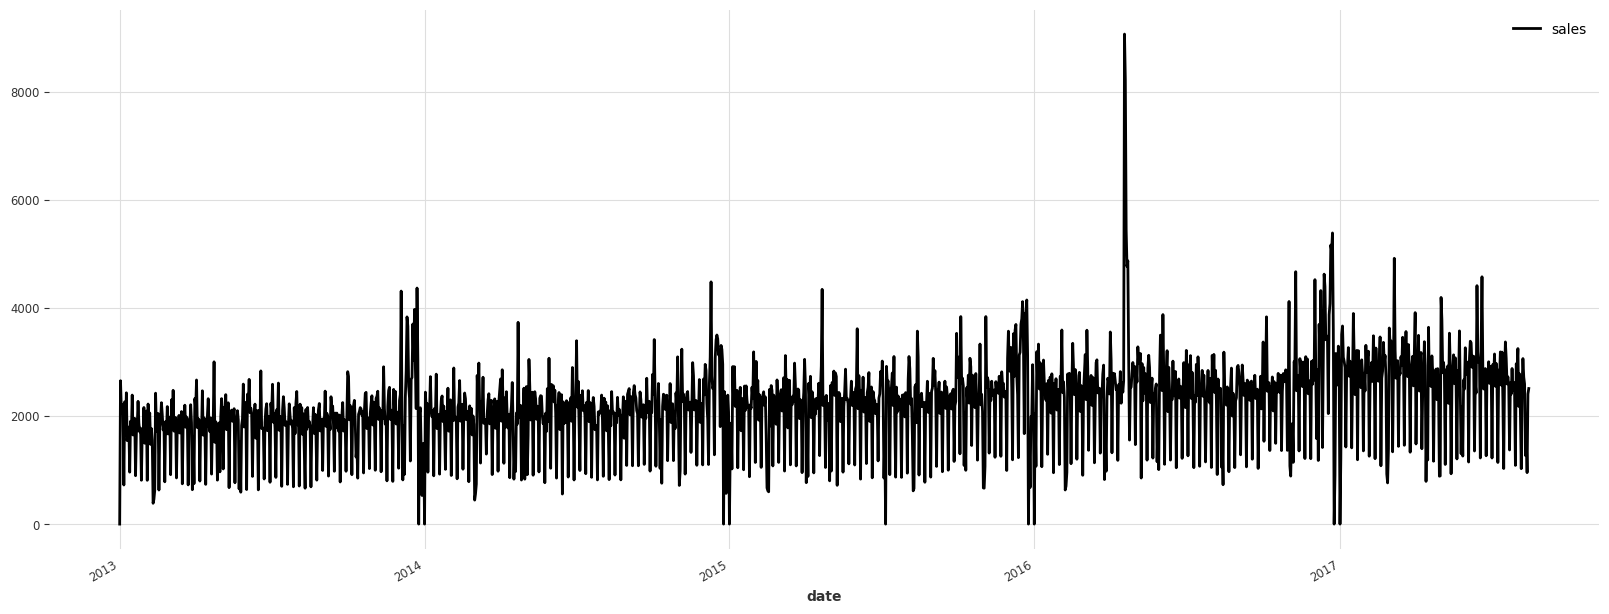

In [20]:
plt.figure(figsize = (20,7))

series.plot()

### Create series function

In [264]:
from darts import TimeSeries
def create_series(str_nbr=1, category= "GROCERY I", target_only = True):
    dataframe =  df[(df['store_nbr']==str_nbr) & (df['family']==category)][['date','sales', 'onpromotion', 'dcoilwtico', 'transactions', 'type_holiday', 'locale',	'transferred']]
    if target_only:
        return TimeSeries.from_dataframe(dataframe, time_col = 'date',  value_cols= ["sales" ], freq='D', fill_missing_dates= True, fillna_value= 0)
    else:
        series_tmp = TimeSeries.from_dataframe(dataframe, time_col = 'date', freq='D', value_cols= ['sales', 'onpromotion', 'dcoilwtico', 'transactions'], fill_missing_dates= True, fillna_value= 0)
        return series_tmp



In [265]:
series = create_series()

series_with_covariates = create_series(target_only = False)

In [266]:
series_with_covariates

<TimeSeries (DataArray) (date: 1688, component: 4, sample: 1)>
array([[[   0.  ],
        [   0.  ],
        [  93.14],
        [   0.  ]],

       [[2652.  ],
        [   0.  ],
        [  93.14],
        [2111.  ]],

       [[2121.  ],
        [   0.  ],
        [  92.97],
        [1833.  ]],

       ...,

       [[ 952.  ],
        [  19.  ],
        [  48.81],
        [ 416.  ]],

       [[2407.  ],
        [  30.  ],
        [  47.59],
        [1733.  ]],

       [[2508.  ],
        [  29.  ],
        [  47.57],
        [1693.  ]]])
Coordinates:
  * date       (date) datetime64[ns] 2013-01-01 2013-01-02 ... 2017-08-15
  * component  (component) object 'sales' 'onpromotion' ... 'transactions'
Dimensions without coordinates: sample
Attributes:
    static_covariates:  None
    hierarchy:          None

In [24]:
df.columns

Index(['date', 'store_nbr', 'family', 'sales', 'onpromotion', 'dcoilwtico',
       'city', 'state', 'type_store', 'cluster', 'transactions',
       'type_holiday', 'locale', 'transferred', 'year', 'month', 'day',
       'dayweek', 'quarter', 'weekyear', 'isweekend'],
      dtype='object')

## Time-series from group data

In [8]:
static_cols = [ "city", "state", "type_store", "cluster"]

#df.drop_duplicates(subset=['date'])
group_by_series = TimeSeries.from_group_dataframe(
    df=df,
    time_col="date",
    value_cols="sales",
    group_cols=["store_nbr", "family"],
    static_cols=static_cols,
    freq='D',
    fill_missing_dates= True,
    fillna_value= 0
)

In [9]:
len(group_by_series)

1782

In [10]:
group_by_series[0].static_covariates

static_covariates,store_nbr,family,city,state,type_store,cluster
component,,,,,,
sales,1.0,AUTOMOTIVE,Quito,Pichincha,D,13.0


In [28]:
group_by_series[0].static_covariates["store_nbr"].iloc[0]

1.0

In [29]:
group_by_series[200].static_covariates["family"].iloc[0]

'BEAUTY'

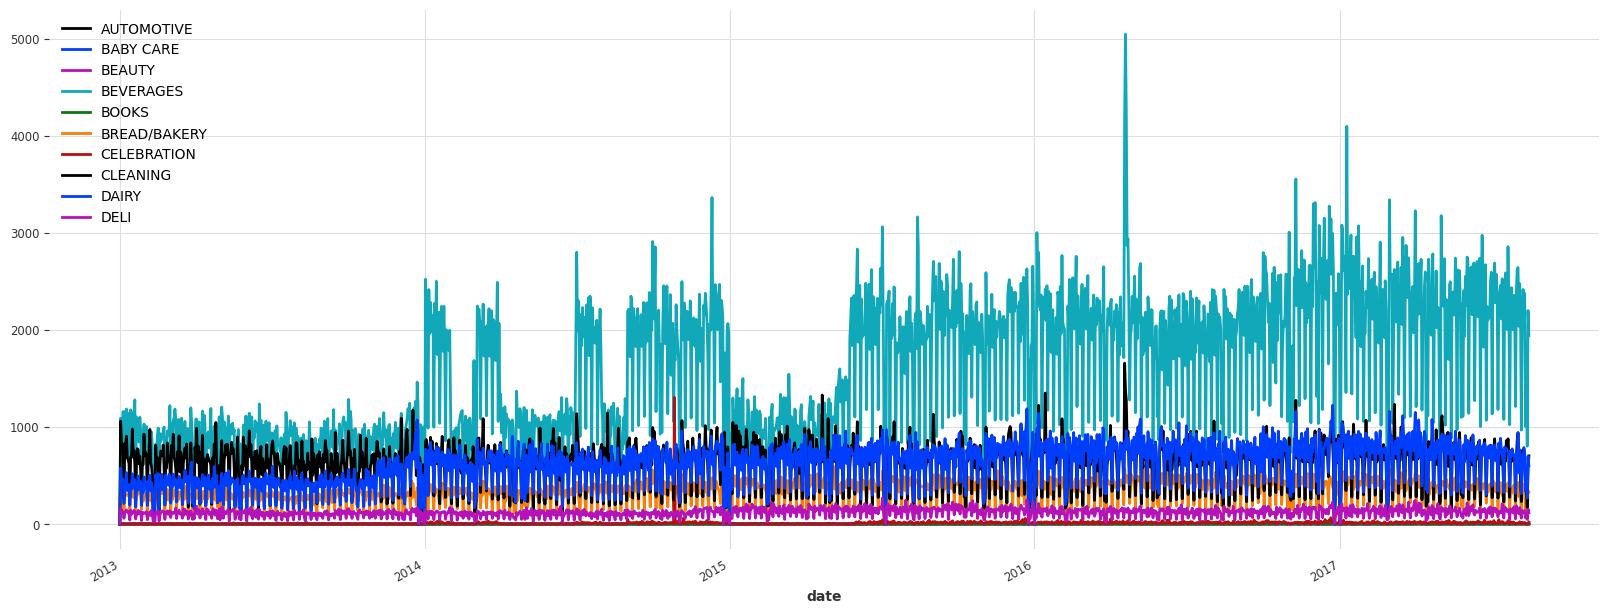

In [269]:
plt.figure(figsize = (20,7))

for ser in group_by_series[:10]:
    cat = ser.static_covariates["family"].iloc[0]
    ser.plot(label = f"{cat}")

In [11]:
# remove static covariates
series_sample = group_by_series[0]
print(series_sample.static_covariates_values())
series_sample1 = TimeSeries.from_series(series_sample.pd_series())
print(series_sample1.static_covariates_values())

[[1.0 'AUTOMOTIVE' 'Quito' 'Pichincha' 'D' 13.0]]
None


# Train_test split

In [270]:
train_series, test_series = series.split_after(.8)

<AxesSubplot: xlabel='date'>

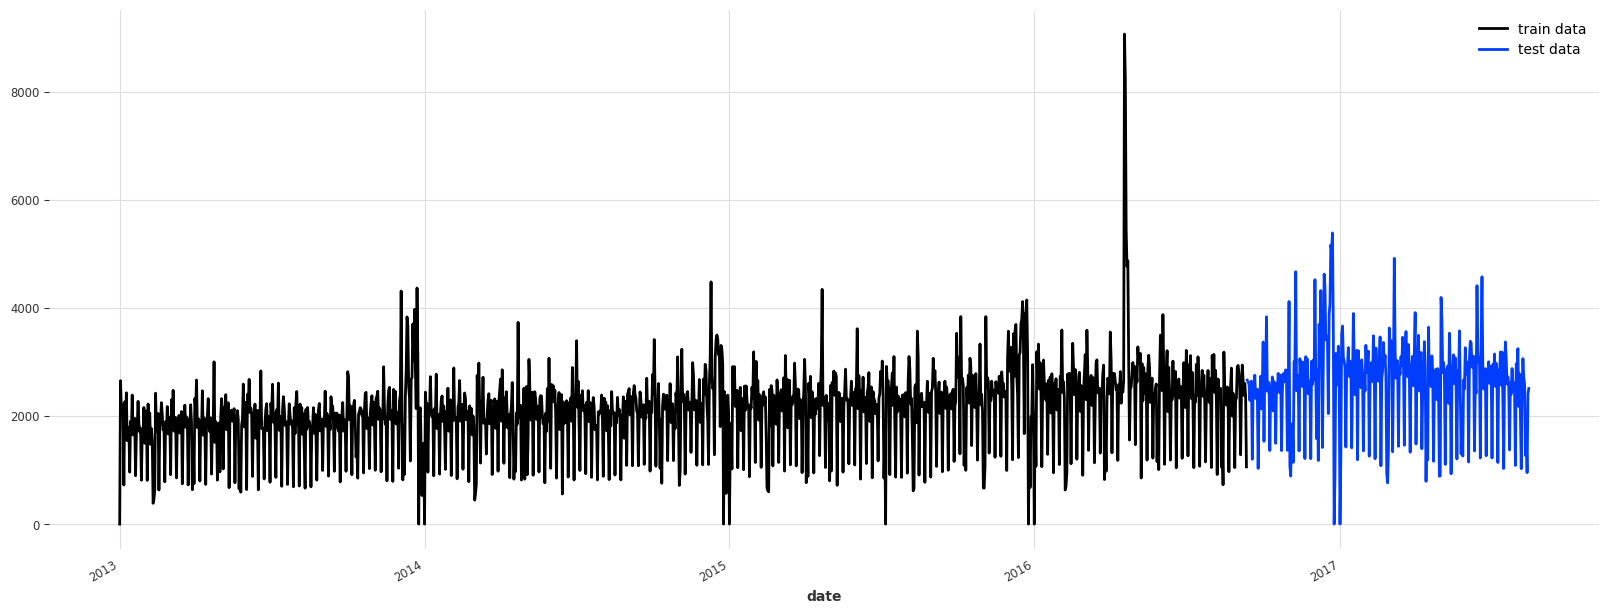

In [271]:
plt.figure(figsize = (20,7))

train_series.plot(label = "train data")
test_series.plot(label = "test data")

# Checking period of seasonality within data

To determine the seasonality period from the decomposed time series, we can analyze the seasonal component to identify repeating patterns. One way to do this is by using autocorrelation function (ACF) plot. ACF measures the correlation between a time series and its lagged values. In the context of seasonality, we can use ACF to find the periodicity in the data.

Autocorrelation is a mathematical representation of the degree of similarity between a given time series and a lagged version of itself over successive time intervals. It's conceptually similar to the correlation between two different time series, but autocorrelation uses the same time series twice: once in its original form and once lagged one or more time periods

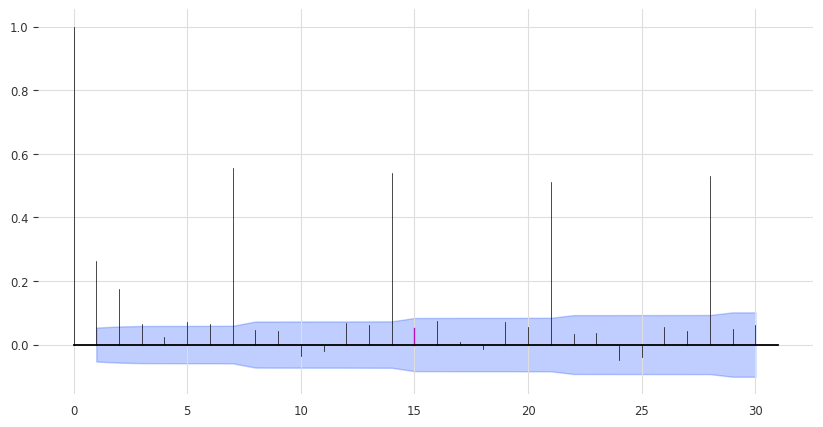

In [33]:
from darts.utils.statistics import plot_acf, check_seasonality
plot_acf(train_series, m=15,max_lag= 30, alpha=0.05)

In [34]:
for m in range(2, 31):
    is_seasonal, period = check_seasonality(train_series['sales'], m=m, max_lag= 30, alpha=0.05)
    if is_seasonal:
        print("There is seasonality of order {}.".format(period))

There is seasonality of order 5.
There is seasonality of order 7.
There is seasonality of order 12.
There is seasonality of order 14.
There is seasonality of order 16.
There is seasonality of order 19.
There is seasonality of order 21.
There is seasonality of order 23.
There is seasonality of order 26.
There is seasonality of order 28.


In [35]:
seasonality_per = [5,7,12,14,16,19,21,23,26,28]

# Extract seasonality and trend

The two possible values for the model parameter are "additive" and "multiplicative." These values represent different ways to decompose a time series into its constituent components: trend, seasonal, and residual.

- Additive Model:

In the additive model, the components of the time series are additive, meaning that the observed value at any given time is the sum of its trend component, seasonal component, and residual component.

Mathematically, the additive decomposition can be represented as follows:
```
Y(t) = Trend(t) + Seasonal(t) + Residual(t)

```

Use the additive model when the magnitude of the seasonal fluctuations remains roughly constant over time. This means that seasonal variations are consistent in absolute terms, regardless of the level of the time series.

- Multiplicative Model:

In the multiplicative model, the components of the time series are multiplicative, meaning that the observed value at any given time is the product of its trend component, seasonal component, and residual component.

Mathematically, the multiplicative decomposition can be represented as follows:

```
Y(t) = Trend(t) * Seasonal(t) * Residual(t)
```

In this model, the seasonal component is multiplied by the trend and residual components.

Use the multiplicative model when the magnitude of the seasonal fluctuations scales with the level of the time series. This means that seasonal variations are proportional to the level of the time series.

***What is level of a time series?***
In the context of time series analysis, the "level" of a time series refers to the baseline or average value around which the data fluctuates over time. It represents the central tendency of the time series and provides information about the typical or expected value of the data at different points in time.

The level of a time series is often associated with the trend component. It can be thought of as the "typical" value of the time series in the absence of any seasonal or random fluctuations. In other words, if you were to smooth out the seasonal variations and random noise, the level of the time series would be what remains as the underlying baseline.

<AxesSubplot: xlabel='date'>

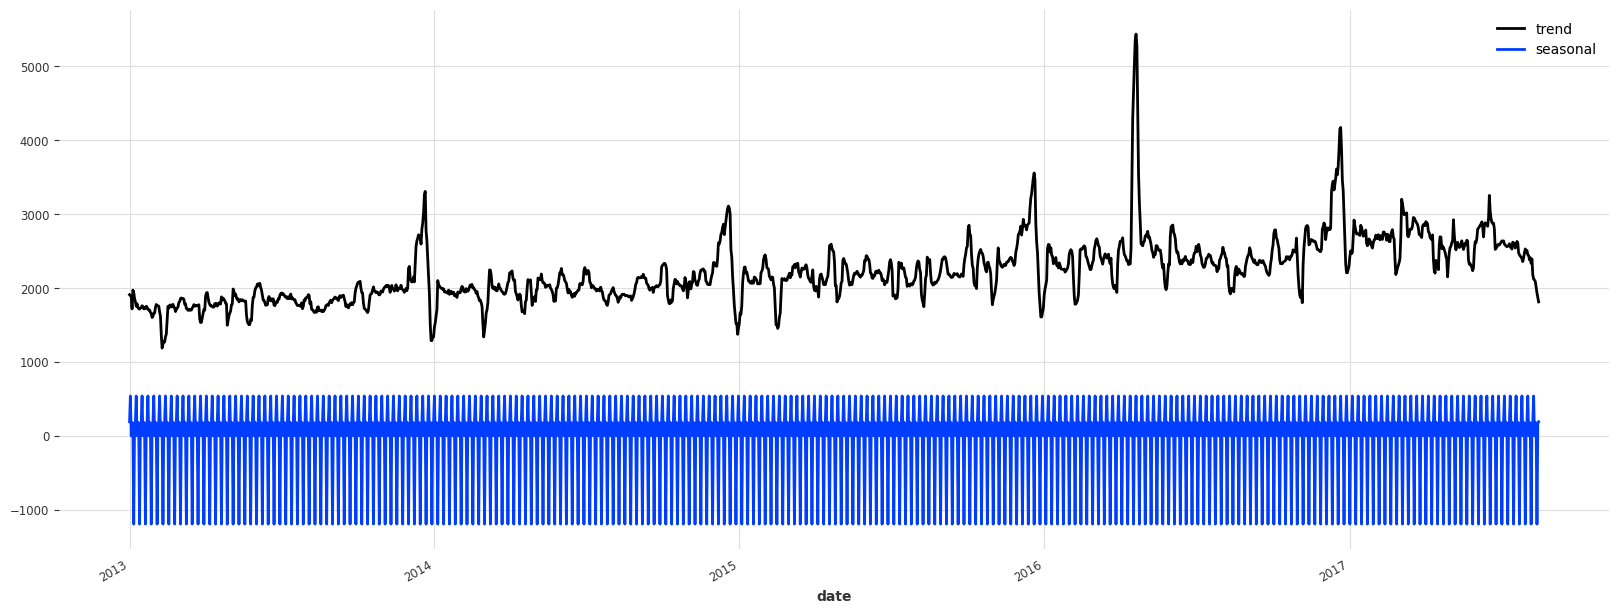

In [36]:
# Extract trend and seasonality with additive model
from darts.utils.statistics import extract_trend_and_seasonality
from darts.utils.utils import ModelMode
plt.figure(figsize = (20,7))

# Decompose the trend component
trend_series, seasonal_series = extract_trend_and_seasonality(ts = series, freq = 7, model = ModelMode.ADDITIVE)

# Plot the trend component
trend_series.plot(label = "trend")
seasonal_series.plot(label = "seasonal")


<AxesSubplot: xlabel='date'>

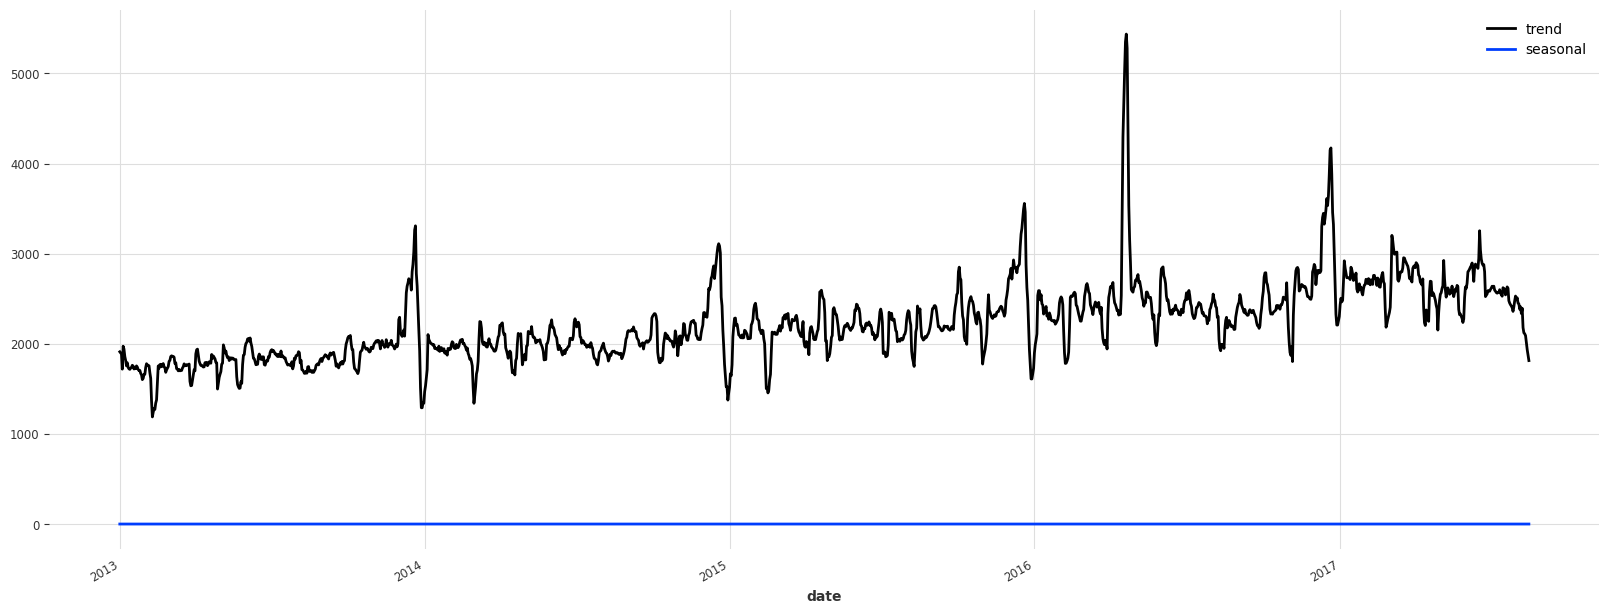

In [37]:
# Extract time and seasonality with multiplicative model. 
# Note that since using this model is allowed just for series with non-zero value, we will first add it with a constant series.

from darts.utils.statistics import extract_trend_and_seasonality
from darts.utils.utils import ModelMode
from darts.utils.timeseries_generation import constant_timeseries


plt.figure(figsize = (20,7))

constant_series = constant_timeseries(start = series.start_time(), end = series.end_time())
series_new =  series + constant_series
# Decompose the trend component
trend_series, seasonal_series = extract_trend_and_seasonality(ts = series_new, freq = 7, model = ModelMode.MULTIPLICATIVE)

# Plot the trend component
trend_series.plot(label = "trend")
seasonal_series.plot(label = "seasonal")

# Model training with Darts

Darts supports diffrent types of forecasting models, from classical machine learning models to Pytorch deep learning and gradient boosting trees. Some of these models support past covariates, some support future covariate and some support both. To find out more about all available Darts forecastibg models and their functionalities, you can take a look at this [link](https://unit8co.github.io/darts/#forecasting-models).

In [7]:
from darts.models import ExponentialSmoothing, NBEATSModel, NaiveSeasonal, NaiveDrift,  TBATS, AutoARIMA, ARIMA, BlockRNNModel, LinearRegressionModel, RNNModel, LightGBMModel, XGBModel, CatBoostModel

from darts.metrics import rmsle, mae


## NaiveSeasonal

**Baseline Model**

The NaiveSeasonal model in Darts is a simple model that only considers the historical values of the **target time series** and its seasonal pattern. It does not take other features like "onpromotion," "dcoilwtico," and "transactions" into account.

<AxesSubplot: xlabel='date'>

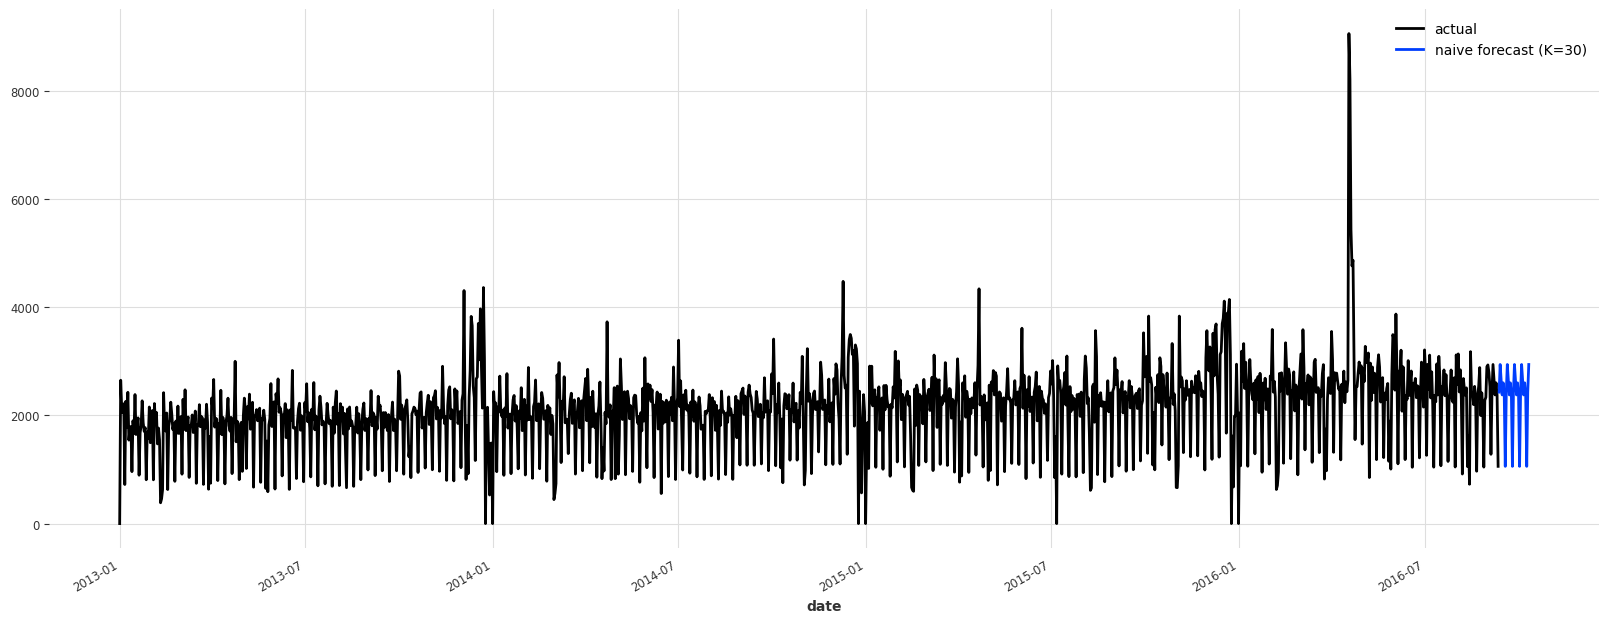

In [272]:
seasonal_model = NaiveSeasonal(K=7)
seasonal_model.fit(train_series)
seasonal_forecast = seasonal_model.predict(30)

plt.figure(figsize = (20,7))

train_series.plot(label="actual")
seasonal_forecast.plot(label="naive forecast (K=30)")

In [40]:
rmsle(test_series, seasonal_model.predict(len(test_series)))

0.5981430188788027

In [41]:
# find the best k among detected seasonality period
seasonality_period = [5,7,12,14,16,19,21,23,26,28]

for k in seasonality_period:
    print(f"K= {k}\n",)
    seasonal_model = NaiveSeasonal(K=k)
    seasonal_model.fit(train_series)
    rmsle_value = rmsle(test_series, seasonal_model.predict(len(test_series)))
    print(f'RMSLE: {rmsle_value:.4f}\n', "-"*29)

K= 5

RMSLE: 0.7754
 -----------------------------
K= 7

RMSLE: 0.5981
 -----------------------------
K= 12

RMSLE: 0.7729
 -----------------------------
K= 14

RMSLE: 0.6022
 -----------------------------
K= 16

RMSLE: 0.7530
 -----------------------------
K= 19

RMSLE: 0.7946
 -----------------------------
K= 21

RMSLE: 0.6039
 -----------------------------
K= 23

RMSLE: 0.7943
 -----------------------------
K= 26

RMSLE: 0.7938
 -----------------------------
K= 28

RMSLE: 0.6155
 -----------------------------


In [ ]:
seasonal_model.historical_forecasts()

## NaiveDrift
**Baseline Model**

***Combination of NaiveSeasonal and NaiveDrift***

NaiveSeasonal is good in detecting seasonality within data, but it can not prefectly detect the trend. NaiveDrift is a simple model for predicting the trend within data.  This model simply produces linear predictions, with a slope that is determined by the first and last values of the training set:

<AxesSubplot: xlabel='date'>

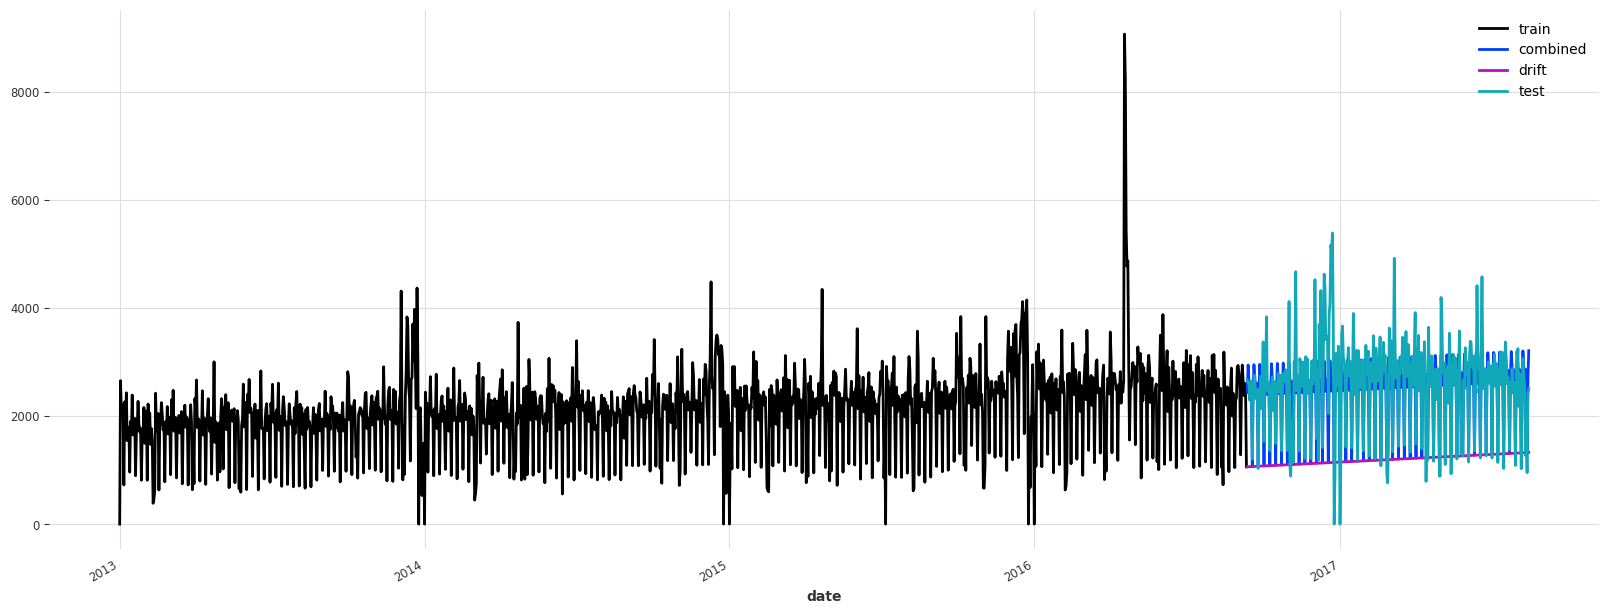

In [273]:
plt.figure(figsize = (20,7))


drift_model = NaiveDrift()
drift_model.fit(train_series)
drift_forecast = drift_model.predict(len(test_series))

seasonal_model = NaiveSeasonal(K=7)
seasonal_model.fit(train_series)
seasonal_forecast = seasonal_model.predict(len(test_series))

combined_forecast = drift_forecast + seasonal_forecast - train_series.last_value()

train_series.plot(label = "train")
combined_forecast.plot(label="combined")
drift_forecast.plot(label="drift")
test_series.plot(label = "test")


In [274]:
rmsle_val = rmsle(test_series, combined_forecast)
print(f'RMSLE: {rmsle_val:.4f}\n')

RMSLE: 0.5981



In [275]:
mae(test_series, combined_forecast)

424.4000355292765

In [45]:
## Check combined model on another series

In [276]:
def combined_naive_models(timeseries, k= 7, train_ratio =.8):
    train, test = timeseries.split_after(train_ratio)
    
    drift_model = NaiveDrift()
    drift_model.fit(train)
    _drift_forecast = drift_model.predict(len(test))
    print(f"Drift RMSLE: {rmsle(test, _drift_forecast)}")

    seasonal_model = NaiveSeasonal(K=k)
    seasonal_model.fit(train)
    _seasonal_forecast = seasonal_model.predict(len(test))
    print(f"Seasonal RMSLE: {rmsle(test, _seasonal_forecast)}")


    _combined_forecast = _drift_forecast + _seasonal_forecast - train.last_value()

    rmsle_err = rmsle(test, _combined_forecast)
    mae_err = mae(test, _combined_forecast)

    print(f' Combination RMSLE: {rmsle_err:.4f}\n', "-"*29)
    print(f' Combination MAE: {mae_err:.4f}\n', "-"*29)


series2 = create_series(str_nbr =1, category = 'GROCERY I')
combined_naive_models(series2)



    

Drift RMSLE: 0.9885402746654757
Seasonal RMSLE: 0.5981430188788027
 Combination RMSLE: 0.5981
 -----------------------------
 Combination MAE: 424.4000
 -----------------------------


## ARIMA
**Statistical / Classic Model**

 ARIMA (AutoRegressive Integrated Moving Average) is a widely used time series forecasting model. It combines the concepts of auto-regression (AR), differencing (I for integrated), and moving averages (MA) to capture different patterns in time series data.

**AutoRegressive (AR)**:

Intuition: The autoregressive component captures the relationship between the current value in the time series and its past values. In other words, it models the dependence of the current value on its previous values.
Mathematics: The AR component is represented as AR(p), where 'p' is the order of the autoregressive term. It uses the previous 'p' values to predict the current value. The relationship is typically modeled as a linear equation, and the coefficients are estimated from the data.

**Integrated (I)**:

Intuition: The differencing component is used to make the time series stationary. A stationary time series has a constant mean and variance over time, which simplifies modeling and forecasting. Non-stationary time series can exhibit trends or seasonality, making forecasting more challenging.
Mathematics: The integration parameter is represented as I(d), where 'd' is the order of differencing. Differencing involves subtracting the time series values at time 't' from the values at time 't-1'. This process is repeated 'd' times until stationarity is achieved.

**Moving Average (MA)**:

Intuition: The moving average component models the relationship between the current value and past white noise or random error terms. It captures the short-term fluctuations or shocks in the time series.
Mathematics: The MA component is represented as MA(q), where 'q' is the order of the moving average term. It uses the previous 'q' white noise terms to predict the current value. Similar to the autoregressive component, the coefficients are estimated from the data.
The ARIMA model combines these three components to create a linear equation that predicts future values based on past values, differencing, and moving average terms. The model parameters (p, d, q) are usually determined through a process called model selection, which involves examining the autocorrelation and partial autocorrelation plots of the time series data.

c:\Users\solmaz\anaconda3\envs\DS\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


RMSLE: 0.6193414310693365


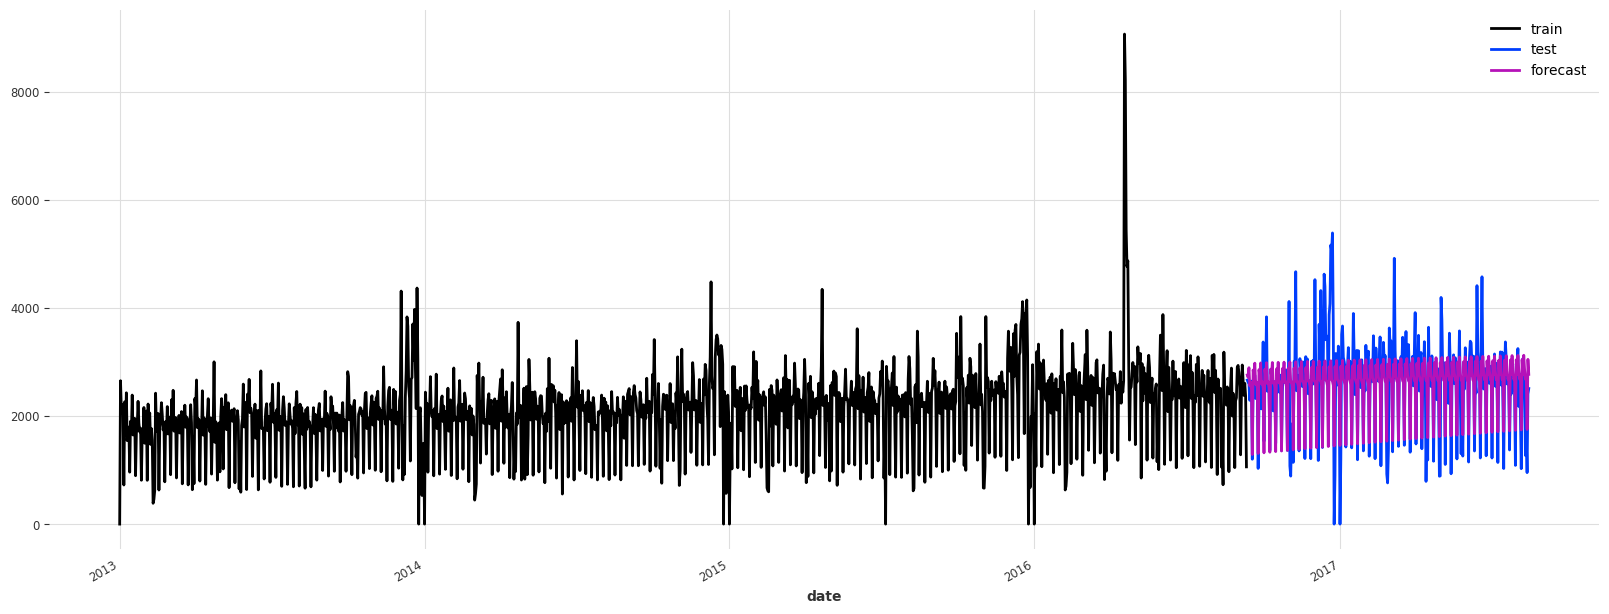

In [47]:
plt.figure(figsize = (20,7))

arima = ARIMA(p =7, d = 0, q = 14, trend = 'ct' )
arima.fit(train_series)

rmsle_value = rmsle(test_series, arima.predict(len(test_series)))

print(f"RMSLE: {rmsle_value}")

prediction = arima.predict(len(test_series),)
#Plotting the predictions
train_series.plot(label = "train")
test_series.plot(label = "test")
prediction.plot(label='forecast', )#low_quantile=0.05, high_quantile=0.95)
plt.legend()


## AutoARIMA

**Statistical / Classic Models**

The auto-ARIMA process seeks to identify the most optimal parameters for an ARIMA model, settling on a single fitted ARIMA model. This process is based on the commonly-used R function, forecast::auto.arima.

Auto-ARIMA works by conducting differencing tests (i.e., Kwiatkowski–Phillips–Schmidt–Shin, Augmented Dickey-Fuller or Phillips–Perron) to determine the order of differencing, d, and then fitting models within ranges of defined start_p, max_p, start_q, max_q ranges. If the seasonal optional is enabled, auto-ARIMA also seeks to identify the optimal P and Q hyper- parameters after conducting the Canova-Hansen to determine the optimal order of seasonal differencing

In [48]:
auto_arima = AutoARIMA(max_p=15, max_d=2, max_q=15, )

auto_arima.fit(train_series)

rmsle_value = rmsle(test_series, auto_arima.predict(len(test_series)))

print(f"RMSLE: {rmsle_value}")

RMSLE: 0.695403176330522


## Exponetial Smoothing

**Statistical / Classic Model**

 Exponential smoothing is a family of forecasting methods that assign exponentially decreasing weights to past observations. The idea is to give more importance to recent data while gradually decreasing the importance of older data. This reflects the belief that recent observations are more relevant for forecasting future values. There are different variants of exponential smoothing, such as Simple Exponential Smoothing, Double Exponential Smoothing (Holt's method), and Triple Exponential Smoothing (Holt-Winters method), each with its own level of complexity and ability to capture different time series patterns (trend, seasonality, etc.).

  ExponetialSmoothing in Darts is a wrapper around statsmodels Holt-Winters’ Exponential Smoothing;

In [49]:
from darts.utils.utils import ModelMode

ex_sm = ExponentialSmoothing(trend = None,seasonal = None )

ex_sm.fit(train_series)
forecast = ex_sm.predict(len(test_series))

rmsle_value = rmsle(test_series, ex_sm.predict(len(test_series)))

print(f"RMSLE: {rmsle_value}")

RMSLE: 0.7046943466978747


In [90]:
from sklearn.metrics import mean_squared_log_error

series2 = create_series(str_nbr = 5, category = 'BABY CARE')

train_series2, test_series2 = series2.split_after(.8)

ex_sm = ExponentialSmoothing(trend = None,seasonal = None )

ex_sm.fit(train_series2)

y_hat = ex_sm.predict(len(test_series2))

y_hat_values =  y_hat.values()
y_hat_values[y_hat_values<0] = 0

mean_squared_log_error(test_series2.values(), y_hat_values, squared= False)

0.7068140430011801

## TBATS

**Statistical / Classic Model**

(Trigonometric seasonality, Box-Cox transformation, ARMA errors, Trend, and Seasonal components):

Intuition: TBATS is a sophisticated time series forecasting model that combines multiple components to capture complex patterns in time series data.

- Trigonometric seasonality: It uses trigonometric functions to capture seasonal patterns that might not be simple periodic patterns.
- Box-Cox transformation: It applies a power transformation to stabilize variance if the data exhibits changing variance over time.
- ARMA errors: It models the errors (residuals) of the time series with an ARMA (AutoRegressive Moving Average) process to capture any autocorrelation.
- Trend and Seasonal components: It models both trend and seasonal components separately, allowing for flexible modeling of time series data with various patterns.

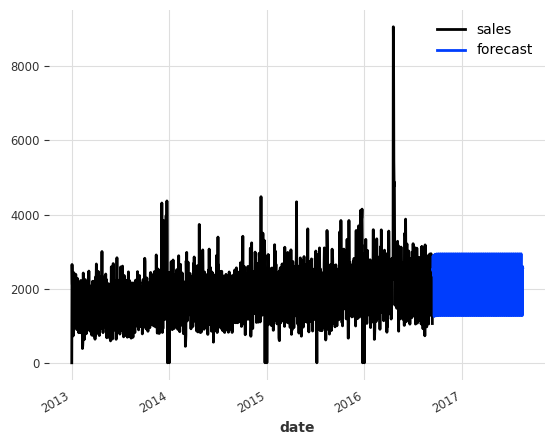

In [50]:
tbats = TBATS(use_box_cox= True, use_trend = True)

tbats.fit(train_series)
prediction = tbats.predict(len(test_series),)# num_samples=1000)
#Plotting the predictions
train_series.plot()
prediction.plot(label='forecast', low_quantile=0.05, high_quantile=0.95)
plt.legend()

## LinearRegressionModel

**Regression Model**

In [88]:
from sklearn.metrics import mean_squared_log_error


lrm = LinearRegressionModel(lags =7)

lrm.fit(train_series)

y_hat = lrm.predict(len(test_series))

print(rmsle(test_series, y_hat))
print(mean_squared_log_error(test_series.values(), y_hat.values(), squared= False))

0.712079159173903
0.712079159173903


In [89]:
from sklearn.metrics import mean_squared_log_error

series2 = create_series(str_nbr = 5, category = 'BABY CARE')

train_series2, test_series2 = series2.split_after(.8)

lrm = LinearRegressionModel(lags =7)

lrm.fit(train_series2)

y_hat = lrm.predict(len(test_series2))

y_hat_values =  y_hat.values()
y_hat_values[y_hat_values<0] = 0

mean_squared_log_error(test_series2.values(), y_hat_values, squared= False)

87.48906377361168

### train on more than one series

0.7125273605438164


<AxesSubplot: xlabel='date'>

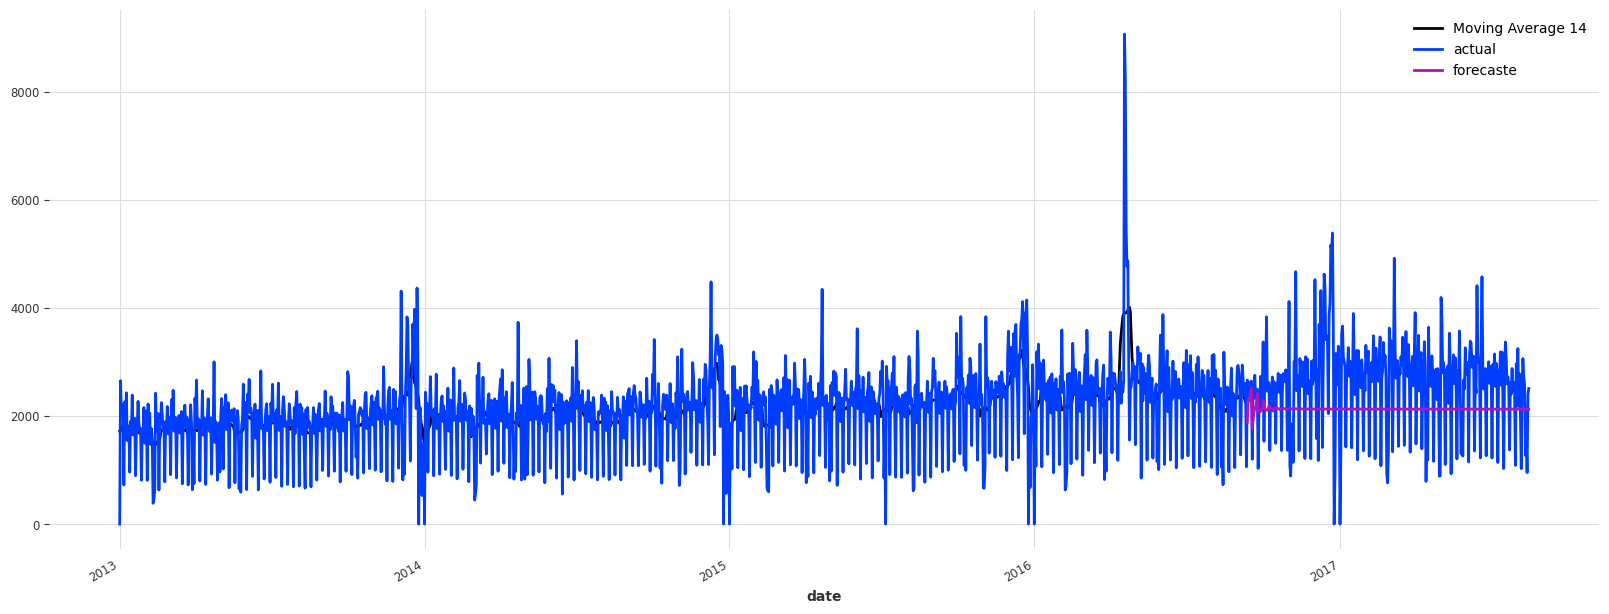

In [291]:
from darts.models.filtering.moving_average_filter import MovingAverageFilter

ma7 = MovingAverageFilter(window =7)
ma14 = MovingAverageFilter(window =14)

series_ma7 = ma7.filter(train_series)
series_ma14 = ma14.filter(train_series)
#series_ma = series_ma7.stack(series_ma14)


lr = LinearRegressionModel(lags =7)
lr.fit([train_series, series_ma7, series_ma14] )
lr_forecaste_ma = lr.predict(n = len(test_series), series= train_series)
print(rmsle(test_series, lr_forecaste_ma ))

plt.figure(figsize = (20,7))

series_ma14.plot(label = "Moving Average 14")
series.plot(label="actual")
lr_forecaste_ma.plot(label="forecaste")


<AxesSubplot: xlabel='date'>

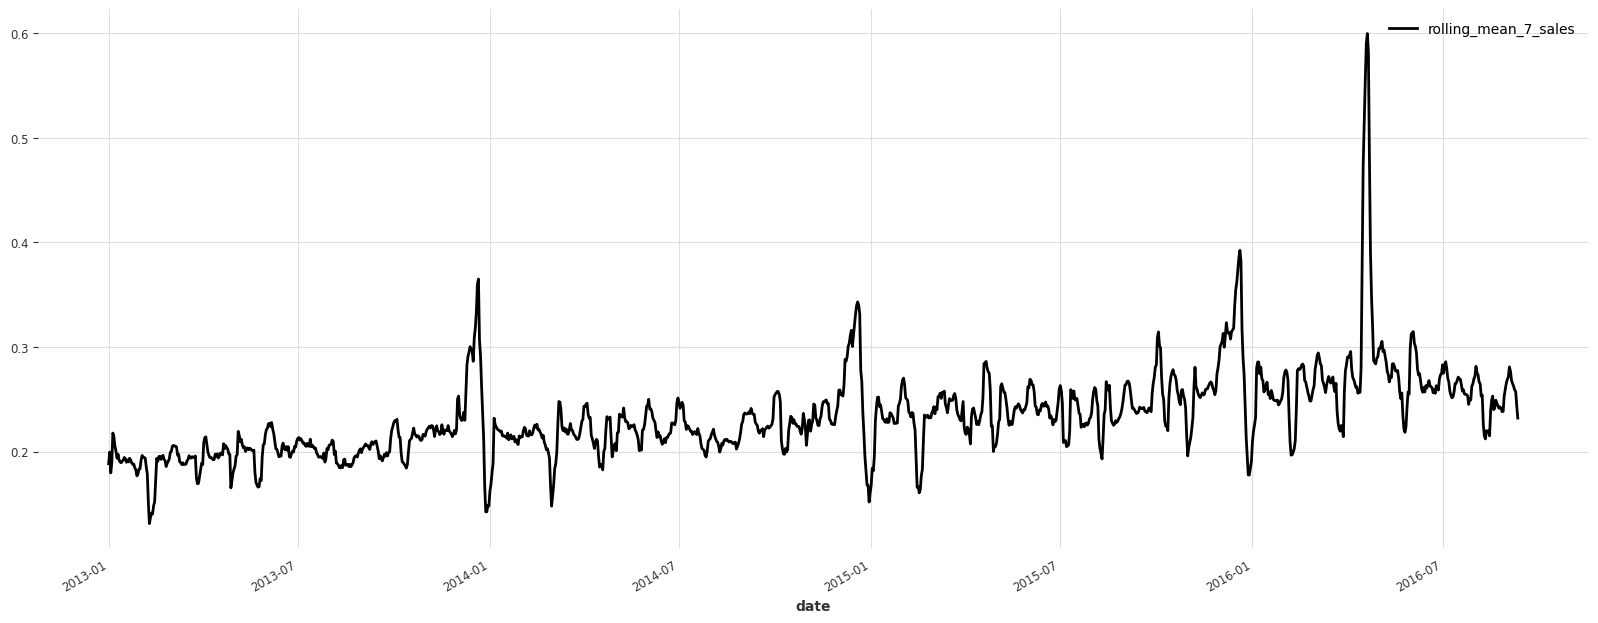

In [332]:
plt.figure(figsize = (20,7))

series_ma7.plot()

### Add Past covariate

0.3283707169821444


<AxesSubplot: xlabel='date'>

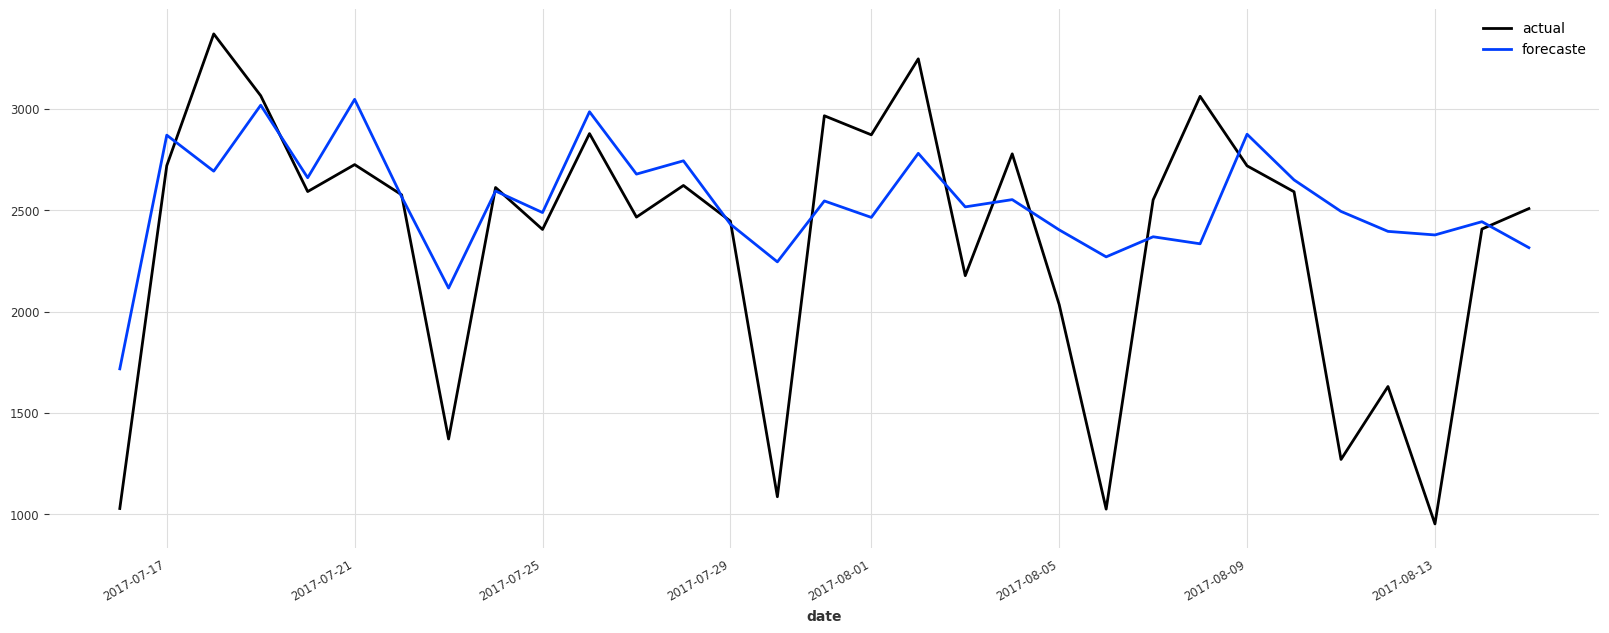

In [365]:
from darts.dataprocessing.transformers import Scaler
from datetime import timedelta
from darts.utils.timeseries_generation import constant_timeseries



split_time = pd.Timestamp("2017-07-15")

train_series, test_series = series.split_after(split_time)

constant_series = constant_timeseries(length=1, value= 0, start= train_series.start_time())

ma7 = MovingAverageFilter(window =7)
ma14 = MovingAverageFilter(window =14)



trans_data = pd.read_csv("./Data/transactions.csv", parse_dates= ['date'])
trans_data_store1 = trans_data[(trans_data["store_nbr"]==1)& (trans_data["date"]<split_time + timedelta(days=1))]
transaction_ts_store1 = TimeSeries.from_dataframe(
    df =trans_data_store1,
    time_col= "date",
    value_cols= "transactions",
    fill_missing_dates= True,
    fillna_value= 0,
    )

transaction_ts_store1 = constant_series.append(transaction_ts_store1 )

sales_scaler_transformation = Scaler()
train_series_scaler_tr = sales_scaler_transformation.fit_transform(train_series)

series_ma7 = ma7.filter(train_series_scaler_tr)
series_ma14 = ma14.filter(train_series_scaler_tr)


trans_scaler_transformation = Scaler()
transaction_ts_store1_scaler_tr = trans_scaler_transformation.fit_transform(transaction_ts_store1)

past_covs = series_ma7.stack(series_ma14).stack( transaction_ts_store1_scaler_tr)

lr = LinearRegressionModel(lags =7, lags_past_covariates=[-31], output_chunk_length= 2 )
lr.fit(train_series_scaler_tr , past_covariates= past_covs )
y_hat = lr.predict(n = len(test_series), series= train_series_scaler_tr, past_covariates= past_covs)
y_hat_inverse = sales_scaler_transformation.inverse_transform(y_hat)
y_hat_values =  y_hat_inverse.values()
y_hat_values[y_hat_values<0] = 0
y_hat_modified = TimeSeries.from_times_and_values(times = test_series.time_index, values= y_hat_values)


print(rmsle(test_series, y_hat_modified ))

plt.figure(figsize = (20,7))

test_series.plot(label="actual")
y_hat_modified.plot(label="forecaste")

0.29582385624172286


<AxesSubplot: xlabel='date'>

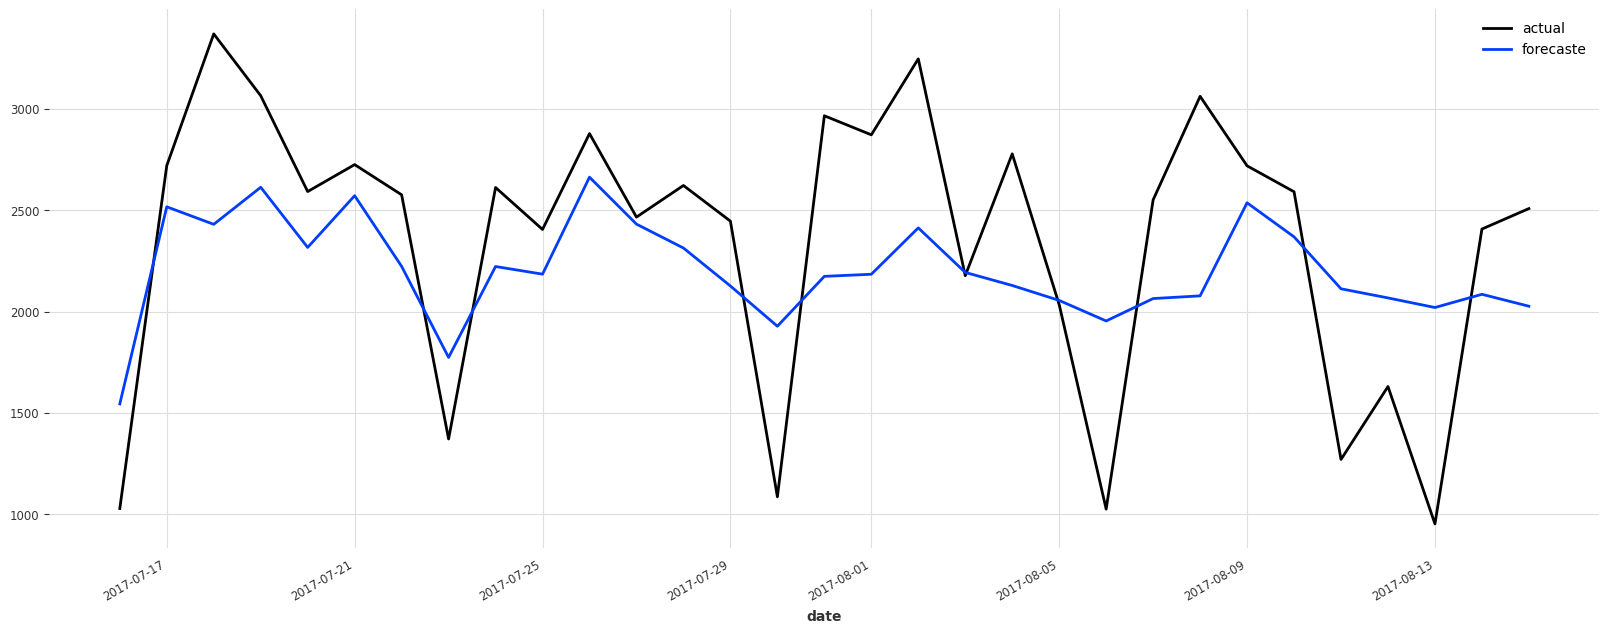

In [369]:
# Instead of scaler transformation, use log transformation for sales series.
from darts.dataprocessing.transformers import Scaler, InvertibleMapper
from datetime import timedelta
from darts.utils.timeseries_generation import constant_timeseries


# Load data and make it ready
split_time = pd.Timestamp("2017-07-15")

train_series, test_series = series.split_after(split_time)

constant_series = constant_timeseries(length=1, value= 0, start= train_series.start_time())


trans_data = pd.read_csv("./Data/transactions.csv", parse_dates= ['date'])
trans_data_store1 = trans_data[(trans_data["store_nbr"]==1)& (trans_data["date"]< split_time + timedelta(days=1))]
transaction_ts_store1 = TimeSeries.from_dataframe(
    df =trans_data_store1,
    time_col= "date",
    value_cols= "transactions",
    fill_missing_dates= True,
    fillna_value= 0,
    )

transaction_ts_store1 = constant_series.append(transaction_ts_store1 )

# Transform data, crate past covariates

ma7 = MovingAverageFilter(window =7)
ma14 = MovingAverageFilter(window =14)

log_transformer = InvertibleMapper(fn = np.log1p, inverse_fn = np.expm1, verbose=False, name="Log-Transform")   
train_series_log_tr = log_transformer.transform(train_series)

series_ma7 = ma7.filter(train_series_log_tr)
series_ma14 = ma14.filter(train_series_log_tr)

trans_scaler_transformation = Scaler()
transaction_ts_store1_scaler_tr = trans_scaler_transformation.fit_transform(transaction_ts_store1)

past_covs = series_ma7.stack(series_ma14).stack( transaction_ts_store1_scaler_tr)

# train model and make prediction

lr = LinearRegressionModel(lags =7, lags_past_covariates=[-31], output_chunk_length= 2 )
lr.fit(train_series_log_tr , past_covariates= past_covs )
y_hat = lr.predict(n = len(test_series), series= train_series_log_tr, past_covariates= past_covs)
y_hat_inverse = log_transformer.inverse_transform(y_hat)
y_hat_values =  y_hat_inverse.values()
y_hat_values[y_hat_values<0] = 0
y_hat_modified = TimeSeries.from_times_and_values(times = test_series.time_index, values= y_hat_values)


print(rmsle(test_series, y_hat_modified ))

plt.figure(figsize = (20,7))

test_series.plot(label="actual")
y_hat_modified.plot(label="forecaste")

0.28882312542661037


<AxesSubplot: xlabel='date'>

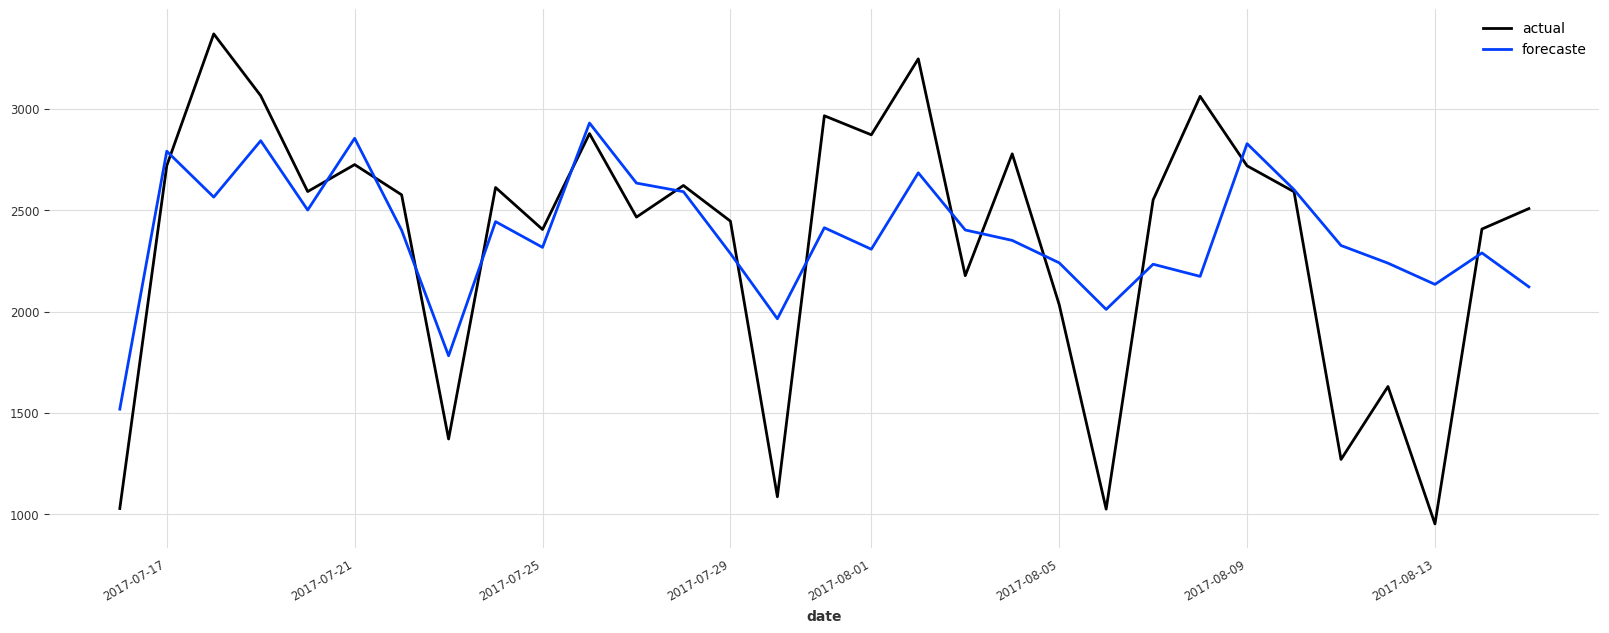

In [379]:
# Instead of scaler transformation, use log transformation for sales series.
from darts.dataprocessing.transformers import Scaler, InvertibleMapper
from datetime import timedelta
from darts.utils.timeseries_generation import constant_timeseries


# Load data and make it ready
split_time = pd.Timestamp("2017-07-15")

train_series, test_series = series.split_after(split_time)

constant_series = constant_timeseries(length=1, value= 0, start= train_series.start_time())


trans_data = pd.read_csv("./Data/transactions.csv", parse_dates= ['date'])
trans_data_store1 = trans_data[(trans_data["store_nbr"]==1)& (trans_data["date"]< split_time + timedelta(days=1))]
transaction_ts_store1 = TimeSeries.from_dataframe(
    df =trans_data_store1,
    time_col= "date",
    value_cols= "transactions",
    fill_missing_dates= True,
    fillna_value= 0,
    )

transaction_ts_store1 = constant_series.append(transaction_ts_store1 )

# Transform data, crate past covariates

ma7 = MovingAverageFilter(window =7)
ma14 = MovingAverageFilter(window =14)

def sale_transformer(x):
    return np.log(x+100)

def sale_inverse_transformer(x):
    return np.exp(x)-100

log_transformer = InvertibleMapper(fn = sale_transformer, inverse_fn = sale_inverse_transformer, verbose=False, name="Log-Transform")   
train_series_log_tr = log_transformer.transform(train_series)

series_ma7 = ma7.filter(train_series_log_tr)
series_ma14 = ma14.filter(train_series_log_tr)

trans_scaler_transformation = Scaler()
transaction_ts_store1_scaler_tr = trans_scaler_transformation.fit_transform(transaction_ts_store1)

past_covs = series_ma7.stack(series_ma14).stack( transaction_ts_store1_scaler_tr)

# train model and make prediction

lr = LinearRegressionModel(lags =7, lags_past_covariates=[-31], output_chunk_length= 2 )
lr.fit(train_series_log_tr , past_covariates= past_covs )
y_hat = lr.predict(n = len(test_series), series= train_series_log_tr, past_covariates= past_covs)
y_hat_inverse = log_transformer.inverse_transform(y_hat)
y_hat_values =  y_hat_inverse.values()
y_hat_values[y_hat_values<0] = 0
y_hat_modified = TimeSeries.from_times_and_values(times = test_series.time_index, values= y_hat_values)


print(rmsle(test_series, y_hat_modified ))

plt.figure(figsize = (20,7))

test_series.plot(label="actual")
y_hat_modified.plot(label="forecaste")

### Add future covariates

2.738930797183944
2192.39715122806


<AxesSubplot: xlabel='date'>

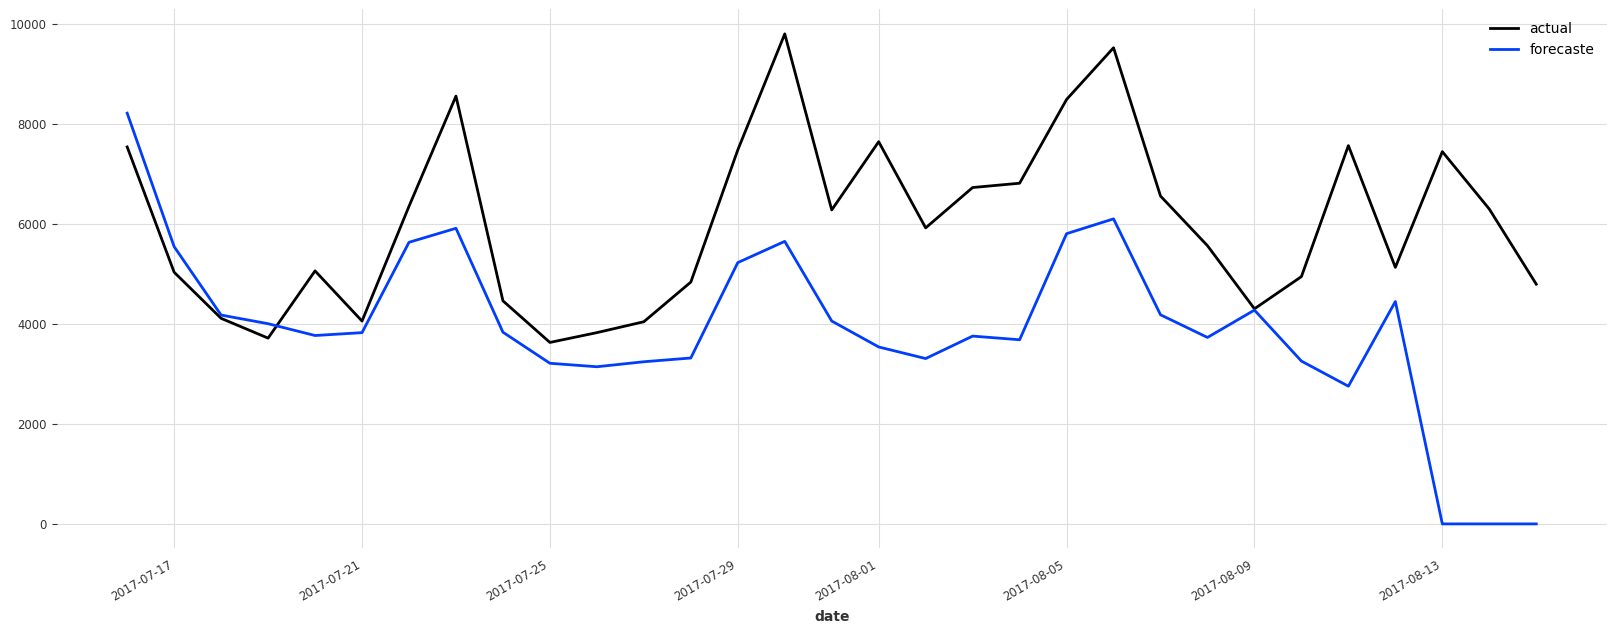

In [30]:
# Instead of scaler transformation, use log transformation for sales series.
from darts import TimeSeries
from darts.dataprocessing import Pipeline
from darts.dataprocessing.transformers import Scaler, InvertibleMapper, MissingValuesFiller
from datetime import timedelta
from darts.utils.timeseries_generation import constant_timeseries
from darts.models.filtering.moving_average_filter import MovingAverageFilter
from darts.utils.timeseries_generation import datetime_attribute_timeseries


#Step 1. Load data and make it ready
train_data = pd.read_csv("./Data/train.csv", parse_dates = ['date'],  index_col='id')
test_data = pd.read_csv("./Data/test.csv", parse_dates = ['date'],  index_col='id')
oil_data = pd.read_csv("./Data/oil.csv", parse_dates= ["date"])
holiday_data = pd.read_csv("./Data/holidays_events.csv", parse_dates= ["date"])
stores_data = pd.read_csv("./Data/stores.csv")
trans_data = pd.read_csv("./Data/transactions.csv", parse_dates= ['date'])

## set basic variables
store_nbr = 20
family = "GROCERY I"
split_time = pd.Timestamp("2017-07-15")

## load the series
train_data = train_data[(train_data['store_nbr']==store_nbr) & (train_data['family']==family)]
test_data = test_data[(test_data['store_nbr']==store_nbr) & (test_data['family']==family)]
series = TimeSeries.from_dataframe(train_data, 
                                   time_col = 'date',  
                                   value_cols= ["sales" ],
                                   freq='D', 
                                   fill_missing_dates= True, 
                                   fillna_value= 0)

series = series.astype(np.float32)

## train_test split
train_series, val_series = series.split_after(split_time)

## set train parameter
forecast_horizen = len(val_series)
lags_past_covariate = list(range(-1*forecast_horizen, -1*forecast_horizen-10, -1))

#Step 2. Transform data
ma7 = MovingAverageFilter(window =7)
ma14 = MovingAverageFilter(window =14)
ma5 = MovingAverageFilter(window = 5)

def sale_transformer(x):
    return np.log(x+100)

def sale_inverse_transformer(x):
    return np.exp(x)-100

log_transformer = InvertibleMapper(fn = sale_transformer, inverse_fn = sale_inverse_transformer, verbose=False, name="Log-Transform")   
train_series_log_tr = log_transformer.transform(train_series)

#Step3. create past covariates

## create transaction series

trans_data_store = trans_data[(trans_data["store_nbr"]==store_nbr)& (trans_data["date"]< split_time + timedelta(days=1))]
transaction_ts_store = TimeSeries.from_dataframe(
    df =trans_data_store,
    time_col= "date",
    value_cols= "transactions",
    fill_missing_dates= True,
    fillna_value= 0,
    freq= 'D'
    )


if transaction_ts_store.start_time() > pd.Timestamp('20130101'):
    delta = (transaction_ts_store.start_time() - pd.Timestamp('20130101')).days
    constant_series = constant_timeseries(length=delta, value= 0, start= train_series.start_time())
    transaction_ts_store = constant_series.append(transaction_ts_store)

##tranform transaction series
trans_scaler_transformation = Scaler()

trans_train, trans_val = transaction_ts_store.split_after(split_time)
trans_train_transfrom = trans_scaler_transformation.fit_transform(trans_train)


series_ma7 = ma7.filter(train_series_log_tr)
series_ma14 = ma14.filter(train_series_log_tr)
series_ma5 = ma5.filter(train_series_log_tr)


past_covs = series_ma7.stack(series_ma14).stack(series_ma28).stack(trans_train_transfrom)

#Step4. Add future covariates

## step 4.1. time based future covariate

full_time_period = pd.date_range(start=train_data['date'].min(), end=test_data['date'].max(), freq='D')

year = datetime_attribute_timeseries(time_index = full_time_period, attribute="year")
month = datetime_attribute_timeseries(time_index = full_time_period, attribute="month")
day = datetime_attribute_timeseries(time_index = full_time_period, attribute="day")
dayofyear = datetime_attribute_timeseries(time_index = full_time_period, attribute="dayofyear")
weekday = datetime_attribute_timeseries(time_index = full_time_period, attribute="dayofweek")
weekofyear = datetime_attribute_timeseries(time_index = full_time_period, attribute="weekofyear")
#onthstart = datetime_attribute_timeseries(time_index = full_time_period, attribute="is_month_start")
#monthend = datetime_attribute_timeseries(time_index = full_time_period, attribute="is_month_end")
weekend = TimeSeries.from_times_and_values(
    times=weekday.time_index,
    values=np.where((weekday.values() == 5) | (weekday.values() == 6), 1, 0),
    columns=["weekend"]
)
timesteps = TimeSeries.from_times_and_values(times=full_time_period,
                                             values=np.arange(len(full_time_period)),
                                             columns=["linear_increase"])

time_cov = year.stack(month).stack(day).stack(dayofyear).stack(weekday).stack(weekofyear).stack(timesteps).stack(weekend)#.stack(monthstart).stack(monthend)
time_cov = time_cov.astype(np.float32)

## Transform time_based future covariats
time_cov_scaler = Scaler()

time_cov_transformed = time_cov_scaler.fit_transform(time_cov)

## step 4.2. Add oil data as future cocariate
oil_data.fillna(method = "backfill", inplace = True)
oil_ts = TimeSeries.from_dataframe(
    df =oil_data,
    time_col= "date",
    value_cols= "dcoilwtico",
    fill_missing_dates= True,
    freq= 'D'
    )
oil_ts = oil_ts.astype(np.float32)
## Transform oil data

oil_filler = MissingValuesFiller()
oil_scaler = Scaler()
oil_pipeline = Pipeline([oil_filler, oil_scaler])
oil_transformed = oil_pipeline.fit_transform(oil_ts)

## step 4.3 Add onpromotion as future covariate
train_data = train_data[(train_data['store_nbr']==store_nbr) & (train_data['family']==family)]
test_data = test_data[(test_data['store_nbr']==store_nbr) & (test_data['family']==family)]

train_promotion_ts = TimeSeries.from_dataframe(train_data, 
                                   time_col = 'date',  
                                   value_cols= ["onpromotion"],
                                   freq='D', 
                                   fill_missing_dates= True, 
                                   fillna_value= 0)

test_promotion_ts = TimeSeries.from_dataframe(test_data, 
                                   time_col = 'date',  
                                   value_cols= ["onpromotion"],
                                   freq='D', 
                                   fill_missing_dates= True, 
                                   fillna_value= 0)


onpromotion_ts = train_promotion_ts.append(test_promotion_ts)
# Transform onpromotion data
onpromotion_scaler = Scaler()
onpromotion_transformed = onpromotion_scaler.fit_transform(onpromotion_ts)

## Moving average on onpromition
onpromotion_ma7 = ma7.filter(onpromotion_transformed)
onpromotion_ma14 = ma14.filter(onpromotion_transformed)

## step 4.4. Add holidays as future covariates
holiday_data = holiday_data.drop_duplicates(subset = ['date'])
holiday_data['navidad'] = np.where(holiday_data.description.str.contains("Navidad"), 1, 0)
holiday_data['cantonizacion'] = np.where(holiday_data.description.str.contains("Cantonizacion"), 1,0)
holiday_data['fundacion'] = np.where(holiday_data.description.str.contains("Fundacion"),1,0)
holiday_data['independencia'] = np.where(holiday_data.description.str.contains("Independencia"),1,0)
holiday_data['provincializacion'] = np.where(holiday_data.description.str.contains("Provincializacion"),1,0)

holiday_ts = TimeSeries.from_dataframe(holiday_data, 
                                   time_col = 'date',  
                                   value_cols= ["navidad",'cantonizacion','fundacion','independencia' ,'provincializacion'],
                                   freq='D', 
                                   fill_missing_dates= True, 
                                   fillna_value= 0)


_, holiday_ts = holiday_ts.split_before(series.start_time())
holiday_ts, _ = holiday_ts.split_after(test_data['date'].max())

## step 4.5 stacking all future covariates
future_covs = time_cov_transformed.stack(oil_transformed).stack(onpromotion_transformed).stack(onpromotion_ma7).stack(onpromotion_ma14).stack(holiday_ts)

#Final Step. train model and make prediction

lr = LinearRegressionModel(lags =7, lags_past_covariates= lags_past_covariate, lags_future_covariates= [7, 14], output_chunk_length= 2 )
lr.fit(train_series_log_tr , past_covariates= past_covs, future_covariates= future_covs )
y_hat = lr.predict(n = len(val_series), series= train_series_log_tr, past_covariates= past_covs, future_covariates= future_covs)
y_hat_inverse = log_transformer.inverse_transform(y_hat)
y_hat_values =  y_hat_inverse.values()
y_hat_values[y_hat_values<0] = 0
y_hat_modified = TimeSeries.from_times_and_values(times = val_series.time_index, values= y_hat_values)


print(rmsle(val_series, y_hat_modified ))
print(mae(val_series, y_hat_modified ))


plt.figure(figsize = (20,7))

val_series.plot(label="actual")
y_hat_modified.plot(label="forecaste")

## NBEATS model

**PyTorch (Lightning)-based Model**

GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs

  | Name          | Type             | Params
---------------------------------------------------
0 | criterion     | MSELoss          | 0     
1 | train_metrics | MetricCollection | 0     
2 | val_metrics   | MetricCollection | 0     
3 | stacks        | ModuleList       | 6.2 M 
---------------------------------------------------
6.2 M     Trainable params
1.5 K     Non-trainable params
6.2 M     Total params
24.994    Total estimated model params size (MB)


Training: 0it [00:00, ?it/s]

`Trainer.fit` stopped: `max_epochs=100` reached.
GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs


Predicting: 0it [00:00, ?it/s]

0.221146593900676


<AxesSubplot: xlabel='date'>

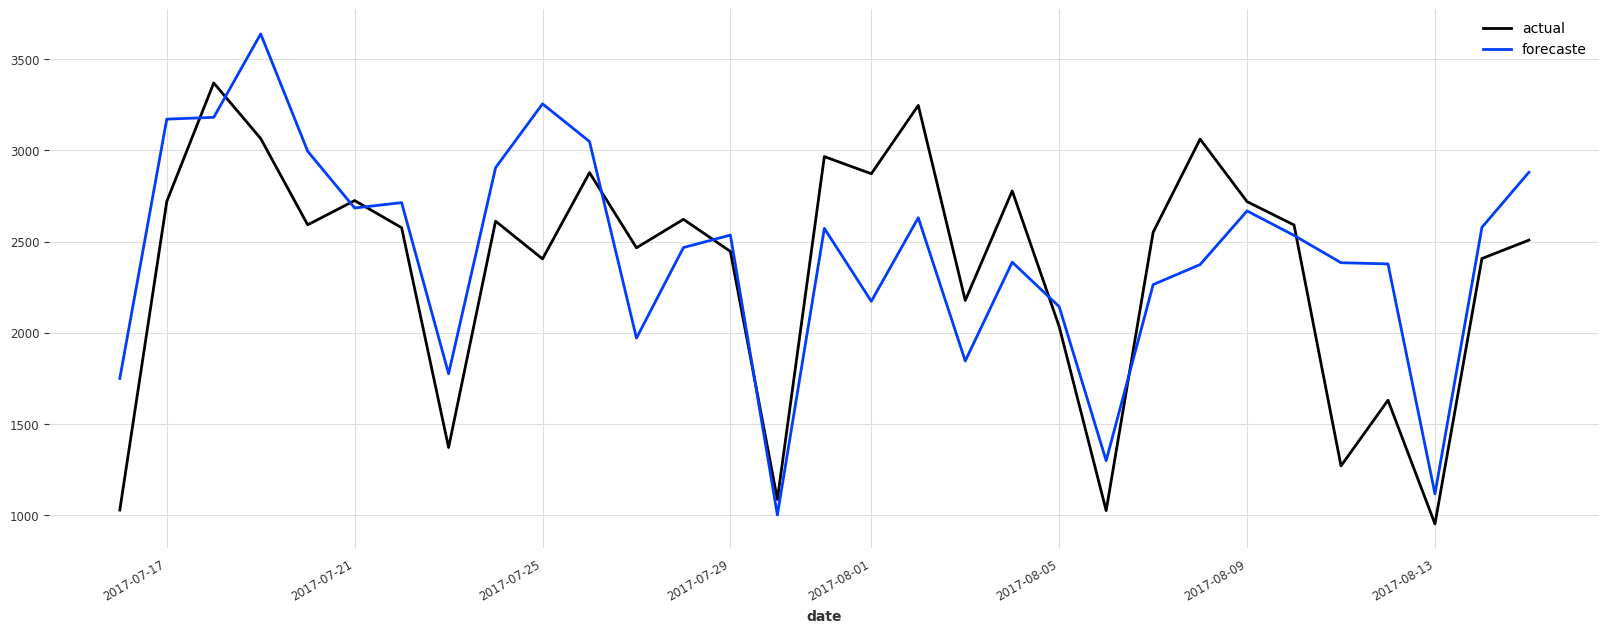

In [366]:


from darts.dataprocessing.transformers import Scaler
from datetime import timedelta
from darts.utils.timeseries_generation import constant_timeseries



split_time = pd.Timestamp("2017-07-15")

train_series, test_series = series.split_after(split_time)

constant_series = constant_timeseries(length=1, value =0, start= train_series.start_time())

ma7 = MovingAverageFilter(window =7)
ma14 = MovingAverageFilter(window =14)


#series_ma = series_ma7.stack(series_ma14)

trans_data = pd.read_csv("./Data/transactions.csv", parse_dates= ['date'])
trans_data_store1 = trans_data[(trans_data["store_nbr"]==1)& (trans_data["date"]<split_time + timedelta(days=1))]
transaction_ts_store1 = TimeSeries.from_dataframe(
    df =trans_data_store1,
    time_col= "date",
    value_cols= "transactions",
    fill_missing_dates= True,
    fillna_value= 0,
    )

transaction_ts_store1 = constant_series.append(transaction_ts_store1 )

sales_scaler_transformation = Scaler()
train_series_scaler_tr = sales_scaler_transformation.fit_transform(train_series)

series_ma7 = ma7.filter(train_series_scaler_tr)
series_ma14 = ma14.filter(train_series_scaler_tr)


trans_scaler_transformation = Scaler()
transaction_ts_store1_scaler_tr = trans_scaler_transformation.fit_transform(transaction_ts_store1)

past_covs = series_ma7.stack(series_ma14).stack( transaction_ts_store1_scaler_tr)

nbeats = NBEATSModel(input_chunk_length=7, output_chunk_length=31, n_epochs=100, random_state=0)
nbeats.fit(train_series_scaler_tr , past_covariates= past_covs )
y_hat = nbeats.predict(n = len(test_series), series= train_series_scaler_tr, past_covariates= past_covs)
y_hat_inverse = sales_scaler_transformation.inverse_transform(y_hat)
y_hat_values =  y_hat_inverse.values()
y_hat_values[y_hat_values<0] = 0
y_hat_modified = TimeSeries.from_times_and_values(times = test_series.time_index, values= y_hat_values)


print(rmsle(test_series, y_hat_modified ))

plt.figure(figsize = (20,7))

test_series.plot(label="actual")
y_hat_modified.plot(label="forecaste")

##  BlockRNNModel- LSTM

**PyTorch (Lightning)-based Model**

just support past covariates


GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs

  | Name          | Type             | Params
---------------------------------------------------
0 | criterion     | MSELoss          | 0     
1 | train_metrics | MetricCollection | 0     
2 | val_metrics   | MetricCollection | 0     
3 | rnn           | LSTM             | 3.1 K 
4 | fc            | Sequential       | 806   
---------------------------------------------------
3.9 K     Trainable params
0         Non-trainable params
3.9 K     Total params
0.016     Total estimated model params size (MB)


Training: 0it [00:00, ?it/s]

`Trainer.fit` stopped: `max_epochs=100` reached.
GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs


Predicting: 0it [00:00, ?it/s]

0.3921798920540555


<AxesSubplot: xlabel='date'>

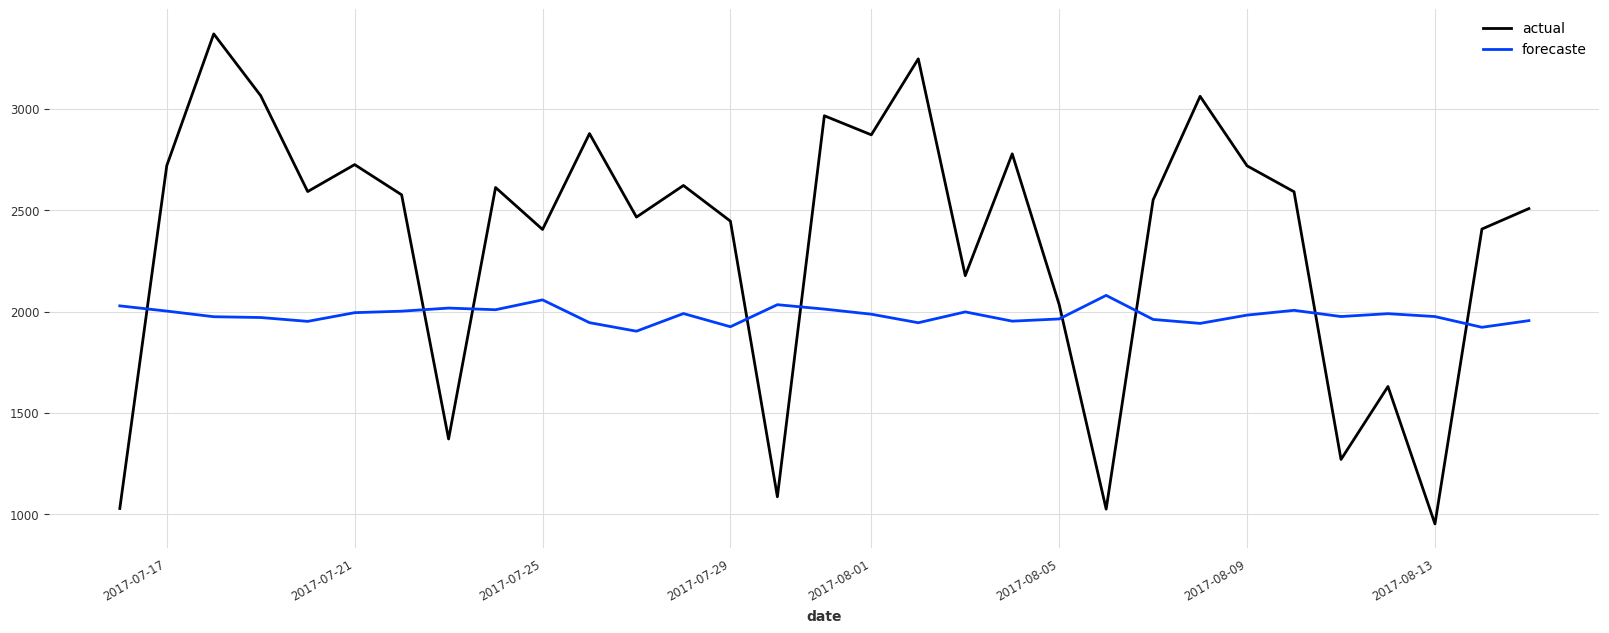

In [372]:
from darts.dataprocessing.transformers import Scaler, InvertibleMapper
from datetime import timedelta
from darts.utils.timeseries_generation import constant_timeseries


# Load data and make it ready
split_time = pd.Timestamp("2017-07-15")

train_series, test_series = series.split_after(split_time)

constant_series = constant_timeseries(length=1, value= 0, start= train_series.start_time())


trans_data = pd.read_csv("./Data/transactions.csv", parse_dates= ['date'])
trans_data_store1 = trans_data[(trans_data["store_nbr"]==1)& (trans_data["date"]< split_time + timedelta(days=1))]
transaction_ts_store1 = TimeSeries.from_dataframe(
    df =trans_data_store1,
    time_col= "date",
    value_cols= "transactions",
    fill_missing_dates= True,
    fillna_value= 0,
    )

transaction_ts_store1 = constant_series.append(transaction_ts_store1 )

# Transform data, crate past covariates

ma7 = MovingAverageFilter(window =7)
ma14 = MovingAverageFilter(window =14)

log_transformer = InvertibleMapper(fn = np.log1p, inverse_fn = np.expm1, verbose=False, name="Log-Transform")   
train_series_log_tr = log_transformer.transform(train_series)

series_ma7 = ma7.filter(train_series_log_tr)
series_ma14 = ma14.filter(train_series_log_tr)

trans_scaler_transformation = Scaler()
transaction_ts_store1_scaler_tr = trans_scaler_transformation.fit_transform(transaction_ts_store1)

past_covs = series_ma7.stack(series_ma14).stack( transaction_ts_store1_scaler_tr)

# train model and make prediction

lstm = BlockRNNModel(
    model="LSTM",
    input_chunk_length=7,
    output_chunk_length=31,
    n_epochs=100,
    random_state=0,
)

lstm.fit(train_series_log_tr , past_covariates= past_covs )
y_hat = lstm.predict(n = len(test_series), series= train_series_log_tr, past_covariates= past_covs)
y_hat_inverse = log_transformer.inverse_transform(y_hat)
y_hat_values =  y_hat_inverse.values()
y_hat_values[y_hat_values<0] = 0
y_hat_modified = TimeSeries.from_times_and_values(times = test_series.time_index, values= y_hat_values)


print(rmsle(test_series, y_hat_modified ))

plt.figure(figsize = (20,7))

test_series.plot(label="actual")
y_hat_modified.plot(label="forecaste")

## RNNModel- LSTM

**PyTorch (Lightning)-based Model**

support future cov

GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs

  | Name          | Type             | Params
---------------------------------------------------
0 | criterion     | MSELoss          | 0     
1 | train_metrics | MetricCollection | 0     
2 | val_metrics   | MetricCollection | 0     
3 | rnn           | LSTM             | 4.5 K 
4 | V             | Linear           | 26    
---------------------------------------------------
4.5 K     Trainable params
0         Non-trainable params
4.5 K     Total params
0.018     Total estimated model params size (MB)


Training: 0it [00:00, ?it/s]

`Trainer.fit` stopped: `max_epochs=100` reached.
GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs


Predicting: 0it [00:00, ?it/s]

0.27622299875194795
1345.5410074150063


<AxesSubplot: xlabel='date'>

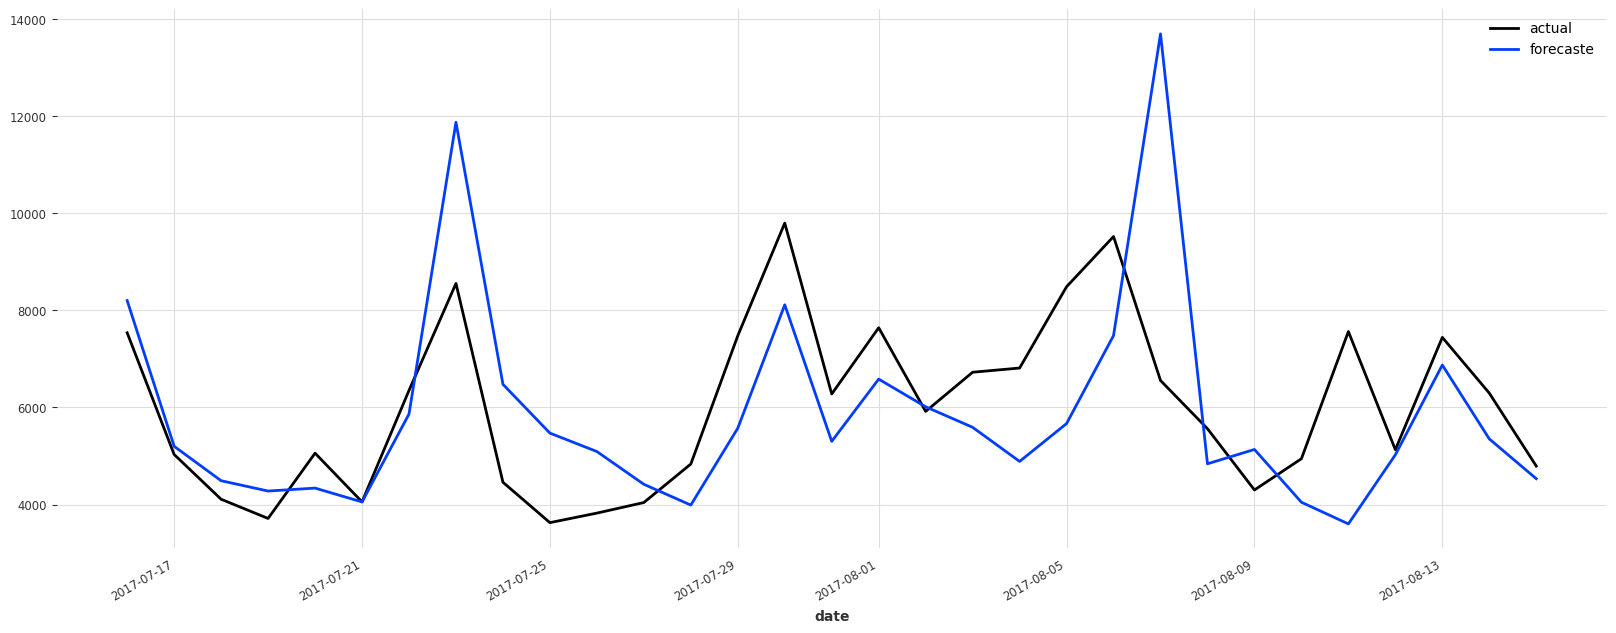

In [41]:
# Instead of scaler transformation, use log transformation for sales series.
from darts import TimeSeries
from darts.dataprocessing import Pipeline
from darts.dataprocessing.transformers import Scaler, InvertibleMapper, MissingValuesFiller
from datetime import timedelta
from darts.utils.timeseries_generation import constant_timeseries
from darts.models.filtering.moving_average_filter import MovingAverageFilter
from darts.utils.timeseries_generation import datetime_attribute_timeseries


#Step 1. Load data and make it ready
train_data = pd.read_csv("./Data/train.csv", parse_dates = ['date'],  index_col='id')
test_data = pd.read_csv("./Data/test.csv", parse_dates = ['date'],  index_col='id')
oil_data = pd.read_csv("./Data/oil.csv", parse_dates= ["date"])
holiday_data = pd.read_csv("./Data/holidays_events.csv", parse_dates= ["date"])
stores_data = pd.read_csv("./Data/stores.csv")
trans_data = pd.read_csv("./Data/transactions.csv", parse_dates= ['date'])

## set basic variables
store_nbr = 20
family = "GROCERY I"
split_time = pd.Timestamp("2017-07-15")

## load the series
train_data = train_data[(train_data['store_nbr']==store_nbr) & (train_data['family']==family)]
test_data = test_data[(test_data['store_nbr']==store_nbr) & (test_data['family']==family)]
series = TimeSeries.from_dataframe(train_data, 
                                   time_col = 'date',  
                                   value_cols= ["sales" ],
                                   freq='D', 
                                   fill_missing_dates= True, 
                                   fillna_value= 0)

series = series.astype(np.float64)#double precision floating point is accaptable for RNN models

## train_test split
train_series, val_series = series.split_after(split_time)

## set train parameter
forecast_horizen = len(val_series)
lags_past_covariate = list(range(-1*forecast_horizen, -1*forecast_horizen-10, -1))

#Step 2. Transform data

## transform the train series

def sale_transformer(x):
    return np.log(x+100)

def sale_inverse_transformer(x):
    return np.exp(x)-100

log_transformer = InvertibleMapper(fn = sale_transformer, inverse_fn = sale_inverse_transformer, verbose=False, name="Log-Transform")   
train_series_log_tr = log_transformer.transform(train_series)

#Step3. Adding  past covariates
## create transaction series

trans_data_store = trans_data[(trans_data["store_nbr"]==store_nbr)& (trans_data["date"]< split_time + timedelta(days=1))]
transaction_ts_store = TimeSeries.from_dataframe(
    df =trans_data_store,
    time_col= "date",
    value_cols= "transactions",
    fill_missing_dates= True,
    fillna_value= 0,
    freq= 'D'
    )

if transaction_ts_store.start_time() > pd.Timestamp('20130101'):
    delta = (transaction_ts_store.start_time() - pd.Timestamp('20130101')).days
    constant_series = constant_timeseries(length=delta, value= 0, start= train_series.start_time())
    transaction_ts_store = constant_series.append(transaction_ts_store)

## tranform transaction series
trans_scaler_transformation = Scaler()

trans_train, trans_val = transaction_ts_store.split_after(split_time)
trans_train_transfrom = trans_scaler_transformation.fit_transform(trans_train)

## apply moving average on train series as past covarients

ma5 = MovingAverageFilter(window = 5)
ma7 = MovingAverageFilter(window =7)
ma14 = MovingAverageFilter(window =14) 

series_ma7 = ma7.filter(train_series_log_tr)
series_ma14 = ma14.filter(train_series_log_tr)
series_ma5 = ma5.filter(train_series_log_tr)


past_covs = series_ma7.stack(series_ma14).stack(series_ma5).stack(trans_train_transfrom)

#Step4. Add future covariates

## step 4.1. time based future covariate

full_time_period = pd.date_range(start=train_data['date'].min(), end=test_data['date'].max(), freq='D')

year = datetime_attribute_timeseries(time_index = full_time_period, attribute="year")
month = datetime_attribute_timeseries(time_index = full_time_period, attribute="month")
day = datetime_attribute_timeseries(time_index = full_time_period, attribute="day")
dayofyear = datetime_attribute_timeseries(time_index = full_time_period, attribute="dayofyear")
weekday = datetime_attribute_timeseries(time_index = full_time_period, attribute="dayofweek")
weekofyear = datetime_attribute_timeseries(time_index = full_time_period, attribute="weekofyear")
#onthstart = datetime_attribute_timeseries(time_index = full_time_period, attribute="is_month_start")
#monthend = datetime_attribute_timeseries(time_index = full_time_period, attribute="is_month_end")
weekend = TimeSeries.from_times_and_values(
    times=weekday.time_index,
    values=np.where((weekday.values() == 5) | (weekday.values() == 6), 1, 0),
    columns=["weekend"]
)
timesteps = TimeSeries.from_times_and_values(times=full_time_period,
                                             values=np.arange(len(full_time_period)),
                                             columns=["linear_increase"])

time_cov = year.stack(month).stack(day).stack(dayofyear).stack(weekday).stack(weekofyear).stack(timesteps).stack(weekend)#.stack(monthstart).stack(monthend)
time_cov = time_cov.astype(np.float64)#double precision floating point is accaptable for RNN models

## Transform time_based future covariats
time_cov_scaler = Scaler()

time_cov_transformed = time_cov_scaler.fit_transform(time_cov)

## step 4.2. Add oil data as future cocariate
oil_data.fillna(method = "backfill", inplace = True)
oil_ts = TimeSeries.from_dataframe(
    df =oil_data,
    time_col= "date",
    value_cols= "dcoilwtico",
    fill_missing_dates= True,
    freq= 'D'
    )
oil_ts = oil_ts.astype(np.float64)#double precision floating point is accaptable for RNN models
## Transform oil data

oil_filler = MissingValuesFiller()
oil_scaler = Scaler()
oil_pipeline = Pipeline([oil_filler, oil_scaler])
oil_transformed = oil_pipeline.fit_transform(oil_ts)

## step 4.3 Add onpromotion as future covariate
train_data = train_data[(train_data['store_nbr']==store_nbr) & (train_data['family']==family)]
test_data = test_data[(test_data['store_nbr']==store_nbr) & (test_data['family']==family)]

train_promotion_ts = TimeSeries.from_dataframe(train_data, 
                                   time_col = 'date',  
                                   value_cols= ["onpromotion"],
                                   freq='D', 
                                   fill_missing_dates= True, 
                                   fillna_value= 0)

test_promotion_ts = TimeSeries.from_dataframe(test_data, 
                                   time_col = 'date',  
                                   value_cols= ["onpromotion"],
                                   freq='D', 
                                   fill_missing_dates= True, 
                                   fillna_value= 0)


onpromotion_ts = train_promotion_ts.append(test_promotion_ts)
# Transform onpromotion data
onpromotion_scaler = Scaler()
onpromotion_transformed = onpromotion_scaler.fit_transform(onpromotion_ts)

## Moving average on onpromition
onpromotion_ma7 = ma7.filter(onpromotion_transformed)
onpromotion_ma14 = ma14.filter(onpromotion_transformed)

## step 4.4. Add holidays as future covariates
holiday_data = holiday_data.drop_duplicates(subset = ['date'])
holiday_data['navidad'] = np.where(holiday_data.description.str.contains("Navidad"), 1, 0)
holiday_data['cantonizacion'] = np.where(holiday_data.description.str.contains("Cantonizacion"), 1,0)
holiday_data['fundacion'] = np.where(holiday_data.description.str.contains("Fundacion"),1,0)
holiday_data['independencia'] = np.where(holiday_data.description.str.contains("Independencia"),1,0)
holiday_data['provincializacion'] = np.where(holiday_data.description.str.contains("Provincializacion"),1,0)

holiday_ts = TimeSeries.from_dataframe(holiday_data, 
                                   time_col = 'date',  
                                   value_cols= ["navidad",'cantonizacion','fundacion','independencia' ,'provincializacion'],
                                   freq='D', 
                                   fill_missing_dates= True, 
                                   fillna_value= 0)


_, holiday_ts = holiday_ts.split_before(series.start_time())
holiday_ts, _ = holiday_ts.split_after(test_data['date'].max())

## step 4.5 stacking all future covariates
future_covs = time_cov_transformed.stack(oil_transformed).stack(onpromotion_transformed).stack(onpromotion_ma7).stack(onpromotion_ma14).stack(holiday_ts)

#Final Step. train model and make prediction

rnn_lstm = RNNModel(
    model="LSTM",
    #hidden_dim=20,
    batch_size=8,
    n_epochs=100,
    #random_state=0,
    training_length=36,
    input_chunk_length=7,
    #force_reset=True,
)
rnn_lstm.fit(train_series_log_tr , future_covariates= future_covs )#,past_covariates= past_covs,
y_hat = rnn_lstm.predict(n = len(val_series), series= train_series_log_tr, future_covariates= future_covs)#, past_covariates= past_covs
y_hat_inverse = log_transformer.inverse_transform(y_hat)
y_hat_values =  y_hat_inverse.values()
y_hat_values[y_hat_values<0] = 0
y_hat_modified = TimeSeries.from_times_and_values(times = val_series.time_index, values= y_hat_values)


print(rmsle(val_series, y_hat_modified ))
print(mae(val_series, y_hat_modified ))


plt.figure(figsize = (20,7))

val_series.plot(label="actual")
y_hat_modified.plot(label="forecaste")

## LightGBM
**Regression Model**

Global Forecasting models
Support both past and future covariates

6.39506710436101e-06
6.395087552846235e-06


<AxesSubplot: xlabel='date'>

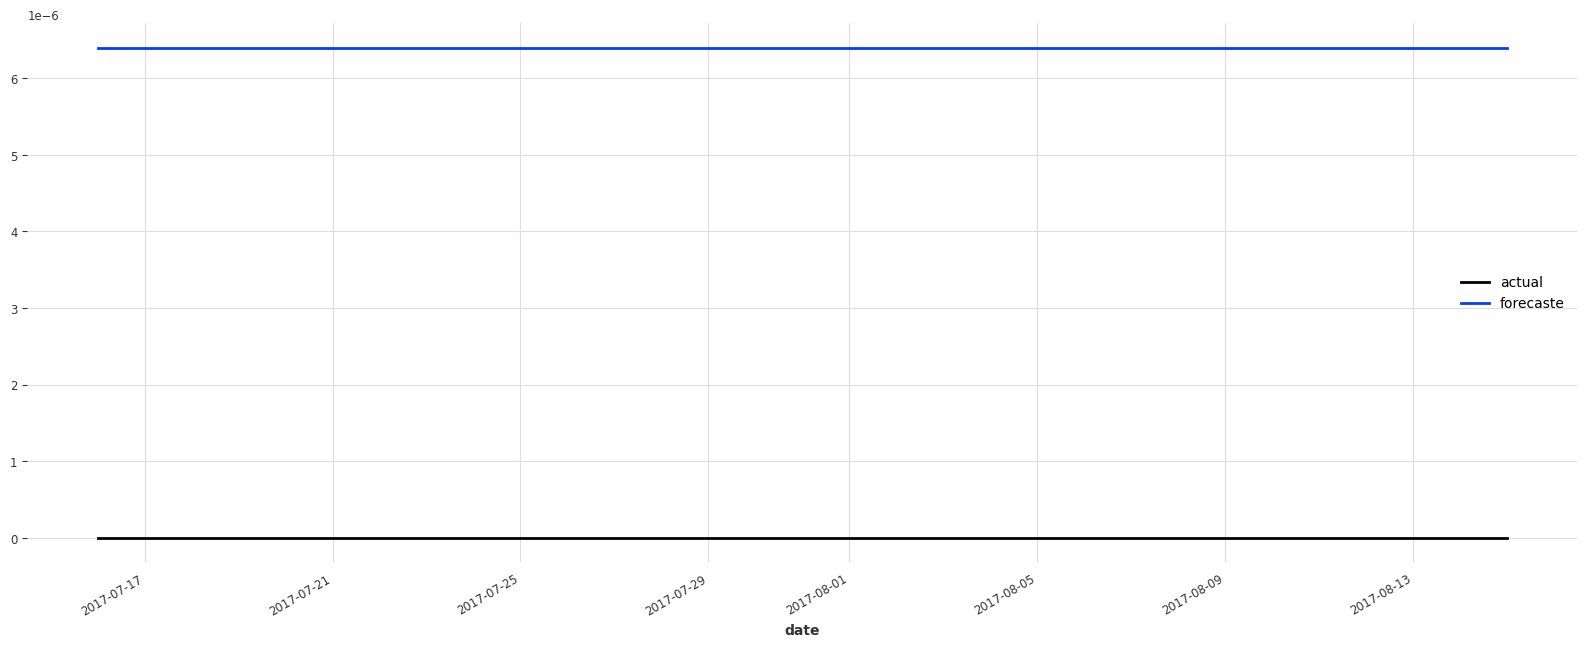

In [8]:
# Instead of scaler transformation, use log transformation for sales series.
from darts import TimeSeries
from darts.dataprocessing import Pipeline
from darts.dataprocessing.transformers import Scaler, InvertibleMapper, MissingValuesFiller
from datetime import timedelta
from darts.utils.timeseries_generation import constant_timeseries
from darts.models.filtering.moving_average_filter import MovingAverageFilter
from darts.utils.timeseries_generation import datetime_attribute_timeseries
from darts.models import LinearRegressionModel, LightGBMModel, XGBModel, CatBoostModel


#Step 1. Load data and make it ready
train_data = pd.read_csv("./Data/train.csv", parse_dates = ['date'],  index_col='id')
test_data = pd.read_csv("./Data/test.csv", parse_dates = ['date'],  index_col='id')
oil_data = pd.read_csv("./Data/oil.csv", parse_dates= ["date"])
holiday_data = pd.read_csv("./Data/holidays_events.csv", parse_dates= ["date"])
stores_data = pd.read_csv("./Data/stores.csv")
trans_data = pd.read_csv("./Data/transactions.csv", parse_dates= ['date'])

## set basic variables
store_nbr = 1
family = "BABY CARE"
split_time = pd.Timestamp("2017-07-15")

## load the series
train_data = train_data[(train_data['store_nbr']==store_nbr) & (train_data['family']==family)]
test_data = test_data[(test_data['store_nbr']==store_nbr) & (test_data['family']==family)]
series = TimeSeries.from_dataframe(train_data, 
                                   time_col = 'date',  
                                   value_cols= ["sales" ],
                                   freq='D', 
                                   fill_missing_dates= True, 
                                   fillna_value= 0)

series = series.astype(np.float32)

## train_test split
train_series, val_series = series.split_after(split_time)

## set train parameter
forecast_horizen = len(val_series)
lags_past_covariate = list(range(-1*forecast_horizen, -1*forecast_horizen-10, -1))

#Step 2. Transform data
ma7 = MovingAverageFilter(window =7)
ma14 = MovingAverageFilter(window =14)
ma5 = MovingAverageFilter(window = 5)

def sale_transformer(x):
    return np.log(x+100)

def sale_inverse_transformer(x):
    return np.exp(x)-100

log_transformer = InvertibleMapper(fn = sale_transformer, inverse_fn = sale_inverse_transformer, verbose=False, name="Log-Transform")   
train_series_log_tr = log_transformer.transform(train_series)

#Step3. create past covariates

## create transaction series

trans_data_store = trans_data[(trans_data["store_nbr"]==store_nbr)& (trans_data["date"]< split_time + timedelta(days=1))]
transaction_ts_store = TimeSeries.from_dataframe(
    df =trans_data_store,
    time_col= "date",
    value_cols= "transactions",
    fill_missing_dates= True,
    fillna_value= 0,
    freq= 'D'
    )


if transaction_ts_store.start_time() > pd.Timestamp('20130101'):
    delta = (transaction_ts_store.start_time() - pd.Timestamp('20130101')).days
    constant_series = constant_timeseries(length=delta, value= 0, start= train_series.start_time())
    transaction_ts_store = constant_series.append(transaction_ts_store)

##tranform transaction series
trans_scaler_transformation = Scaler()

trans_train, trans_val = transaction_ts_store.split_after(split_time)
trans_train_transfrom = trans_scaler_transformation.fit_transform(trans_train)


series_ma7 = ma7.filter(train_series_log_tr)
series_ma14 = ma14.filter(train_series_log_tr)
series_ma5 = ma5.filter(train_series_log_tr)


past_covs = series_ma7.stack(series_ma14).stack(series_ma5).stack(trans_train_transfrom)

#Step4. Add future covariates

## step 4.1. time based future covariate

full_time_period = pd.date_range(start=train_data['date'].min(), end=test_data['date'].max(), freq='D')

year = datetime_attribute_timeseries(time_index = full_time_period, attribute="year")
month = datetime_attribute_timeseries(time_index = full_time_period, attribute="month")
day = datetime_attribute_timeseries(time_index = full_time_period, attribute="day")
dayofyear = datetime_attribute_timeseries(time_index = full_time_period, attribute="dayofyear")
weekday = datetime_attribute_timeseries(time_index = full_time_period, attribute="dayofweek")
weekofyear = datetime_attribute_timeseries(time_index = full_time_period, attribute="weekofyear")
#onthstart = datetime_attribute_timeseries(time_index = full_time_period, attribute="is_month_start")
#monthend = datetime_attribute_timeseries(time_index = full_time_period, attribute="is_month_end")
weekend = TimeSeries.from_times_and_values(
    times=weekday.time_index,
    values=np.where((weekday.values() == 5) | (weekday.values() == 6), 1, 0),
    columns=["weekend"]
)
timesteps = TimeSeries.from_times_and_values(times=full_time_period,
                                             values=np.arange(len(full_time_period)),
                                             columns=["linear_increase"])

time_cov = year.stack(month).stack(day).stack(dayofyear).stack(weekday).stack(weekofyear).stack(timesteps).stack(weekend)#.stack(monthstart).stack(monthend)
time_cov = time_cov.astype(np.float32)

## Transform time_based future covariats
time_cov_scaler = Scaler()

time_cov_transformed = time_cov_scaler.fit_transform(time_cov)

## step 4.2. Add oil data as future cocariate
oil_data.fillna(method = "backfill", inplace = True)
oil_ts = TimeSeries.from_dataframe(
    df =oil_data,
    time_col= "date",
    value_cols= "dcoilwtico",
    fill_missing_dates= True,
    freq= 'D'
    )
oil_ts = oil_ts.astype(np.float32)
## Transform oil data

oil_filler = MissingValuesFiller()
oil_scaler = Scaler()
oil_pipeline = Pipeline([oil_filler, oil_scaler])
oil_transformed = oil_pipeline.fit_transform(oil_ts)

## step 4.3 Add onpromotion as future covariate
train_data = train_data[(train_data['store_nbr']==store_nbr) & (train_data['family']==family)]
test_data = test_data[(test_data['store_nbr']==store_nbr) & (test_data['family']==family)]

train_promotion_ts = TimeSeries.from_dataframe(train_data, 
                                   time_col = 'date',  
                                   value_cols= ["onpromotion"],
                                   freq='D', 
                                   fill_missing_dates= True, 
                                   fillna_value= 0)

test_promotion_ts = TimeSeries.from_dataframe(test_data, 
                                   time_col = 'date',  
                                   value_cols= ["onpromotion"],
                                   freq='D', 
                                   fill_missing_dates= True, 
                                   fillna_value= 0)


onpromotion_ts = train_promotion_ts.append(test_promotion_ts)
# Transform onpromotion data
onpromotion_scaler = Scaler()
onpromotion_transformed = onpromotion_scaler.fit_transform(onpromotion_ts)

## Moving average on onpromition
onpromotion_ma7 = ma7.filter(onpromotion_transformed)
onpromotion_ma14 = ma14.filter(onpromotion_transformed)

## step 4.4. Add holidays as future covariates
holiday_data = holiday_data.drop_duplicates(subset = ['date'])
holiday_data['navidad'] = np.where(holiday_data.description.str.contains("Navidad"), 1, 0)
holiday_data['cantonizacion'] = np.where(holiday_data.description.str.contains("Cantonizacion"), 1,0)
holiday_data['fundacion'] = np.where(holiday_data.description.str.contains("Fundacion"),1,0)
holiday_data['independencia'] = np.where(holiday_data.description.str.contains("Independencia"),1,0)
holiday_data['provincializacion'] = np.where(holiday_data.description.str.contains("Provincializacion"),1,0)

holiday_ts = TimeSeries.from_dataframe(holiday_data, 
                                   time_col = 'date',  
                                   value_cols= ["navidad",'cantonizacion','fundacion','independencia' ,'provincializacion'],
                                   freq='D', 
                                   fill_missing_dates= True, 
                                   fillna_value= 0)


_, holiday_ts = holiday_ts.split_before(series.start_time())
holiday_ts, _ = holiday_ts.split_after(test_data['date'].max())

## step 4.5 stacking all future covariates
future_covs = time_cov_transformed.stack(oil_transformed).stack(onpromotion_transformed).stack(onpromotion_ma7).stack(onpromotion_ma14).stack(holiday_ts)

#Final Step. train model and make prediction

lgbm = LightGBMModel(lags = 7, lags_past_covariates= lags_past_covariate, lags_future_covariates=[7,14], verbose = -1)
lgbm.fit(train_series_log_tr , past_covariates= past_covs, future_covariates= future_covs )
y_hat = lgbm.predict(n = len(val_series), series= train_series_log_tr, past_covariates= past_covs, future_covariates= future_covs)
y_hat_inverse = log_transformer.inverse_transform(y_hat)
y_hat_values =  y_hat_inverse.values()
y_hat_values[y_hat_values<0] = 0
y_hat_modified = TimeSeries.from_times_and_values(times = val_series.time_index, values= y_hat_values)


print(rmsle(val_series, y_hat_modified ))
print(mae(val_series, y_hat_modified ))


plt.figure(figsize = (20,7))

val_series.plot(label="actual")
y_hat_modified.plot(label="forecaste")

## XGBModel

0.57674736
2.325533


<AxesSubplot: xlabel='date'>

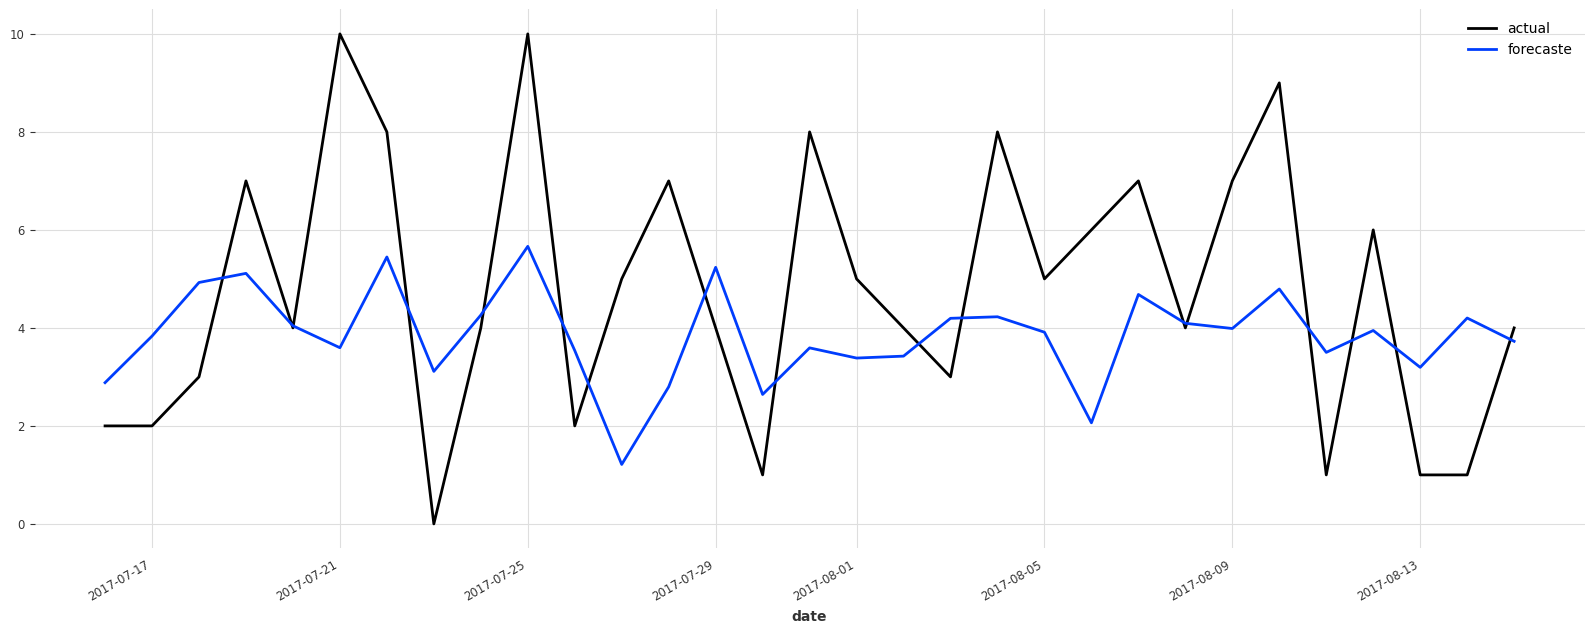

In [13]:
# Instead of scaler transformation, use log transformation for sales series.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from darts import TimeSeries
from darts.dataprocessing import Pipeline
from darts.dataprocessing.transformers import Scaler, InvertibleMapper, MissingValuesFiller
from datetime import timedelta
from darts.utils.timeseries_generation import constant_timeseries
from darts.models.filtering.moving_average_filter import MovingAverageFilter
from darts.utils.timeseries_generation import datetime_attribute_timeseries


#Step 1. Load data and make it ready
train_data = pd.read_csv("./Data/train.csv", parse_dates = ['date'],  index_col='id')
test_data = pd.read_csv("./Data/test.csv", parse_dates = ['date'],  index_col='id')
oil_data = pd.read_csv("./Data/oil.csv", parse_dates= ["date"])
holiday_data = pd.read_csv("./Data/holidays_events.csv", parse_dates= ["date"])
stores_data = pd.read_csv("./Data/stores.csv")
trans_data = pd.read_csv("./Data/transactions.csv", parse_dates= ['date'])

## set basic variables
store_nbr = 1
family = "AUTOMOTIVE"
split_time = pd.Timestamp("2017-07-15")

## load the series
train_data = train_data[(train_data['store_nbr']==store_nbr) & (train_data['family']==family)]
test_data = test_data[(test_data['store_nbr']==store_nbr) & (test_data['family']==family)]
series = TimeSeries.from_dataframe(train_data, 
                                   time_col = 'date',  
                                   value_cols= ["sales" ],
                                   freq='D', 
                                   fill_missing_dates= True, 
                                   fillna_value= 0)

series = series.astype(np.float32)

## train_test split
train_series, val_series = series.split_after(split_time)

## set train parameter
forecast_horizen = len(val_series)
lags_past_covariate = list(range(-1*forecast_horizen, -1*forecast_horizen-10, -1))

#Step 2. Transform data

## transform the train series

def sale_transformer(x):
    return np.log(x+100)

def sale_inverse_transformer(x):
    return np.exp(x)-100

log_transformer = InvertibleMapper(fn = sale_transformer, inverse_fn = sale_inverse_transformer,)   
sales_scaler = Scaler()
sales_pipeline = Pipeline([log_transformer, sales_scaler])

train_series_transformed = sales_pipeline.fit_transform(train_series)

#Step3. Adding  past covariates
## create transaction series

trans_data_store = trans_data[(trans_data["store_nbr"]==store_nbr)& (trans_data["date"]< split_time + timedelta(days=1))]
transaction_ts_store = TimeSeries.from_dataframe(
    df =trans_data_store,
    time_col= "date",
    value_cols= "transactions",
    fill_missing_dates= True,
    fillna_value= 0,
    freq= 'D'
    )

if transaction_ts_store.start_time() > pd.Timestamp('20130101'):
    delta = (transaction_ts_store.start_time() - pd.Timestamp('20130101')).days
    constant_series = constant_timeseries(length=delta, value= 0, start= train_series.start_time())
    transaction_ts_store = constant_series.append(transaction_ts_store)

## tranform transaction series
trans_scaler_transformation = Scaler()

trans_train, trans_val = transaction_ts_store.split_after(split_time)
trans_train_transfrom = trans_scaler_transformation.fit_transform(trans_train)

## apply moving average on train series as past covarients

ma5 = MovingAverageFilter(window = 5)
ma7 = MovingAverageFilter(window =7)
ma14 = MovingAverageFilter(window =14) 

series_ma7 = ma7.filter(train_series_transformed)
series_ma14 = ma14.filter(train_series_transformed)
series_ma5 = ma5.filter(train_series_transformed)


past_covs = series_ma7.stack(series_ma14).stack(series_ma5).stack(trans_train_transfrom)

#Step4. Add future covariates

## step 4.1. time based future covariate

full_time_period = pd.date_range(start=train_data['date'].min(), end=test_data['date'].max(), freq='D')

year = datetime_attribute_timeseries(time_index = full_time_period, attribute="year")
month = datetime_attribute_timeseries(time_index = full_time_period, attribute="month")
day = datetime_attribute_timeseries(time_index = full_time_period, attribute="day")
dayofyear = datetime_attribute_timeseries(time_index = full_time_period, attribute="dayofyear")
weekday = datetime_attribute_timeseries(time_index = full_time_period, attribute="dayofweek")
weekofyear = datetime_attribute_timeseries(time_index = full_time_period, attribute="weekofyear")
#onthstart = datetime_attribute_timeseries(time_index = full_time_period, attribute="is_month_start")
#monthend = datetime_attribute_timeseries(time_index = full_time_period, attribute="is_month_end")
weekend = TimeSeries.from_times_and_values(
    times=weekday.time_index,
    values=np.where((weekday.values() == 5) | (weekday.values() == 6), 1, 0),
    columns=["weekend"]
)
timesteps = TimeSeries.from_times_and_values(times=full_time_period,
                                             values=np.arange(len(full_time_period)),
                                             columns=["linear_increase"])

time_cov = year.stack(month).stack(day).stack(dayofyear).stack(weekday).stack(weekofyear).stack(timesteps).stack(weekend)#.stack(monthstart).stack(monthend)
time_cov = time_cov.astype(np.float32)

## Transform time_based future covariats
time_cov_scaler = Scaler()

time_cov_transformed = time_cov_scaler.fit_transform(time_cov)

## step 4.2. Add oil data as future cocariate
oil_data.fillna(method = "backfill", inplace = True)
oil_ts = TimeSeries.from_dataframe(
    df =oil_data,
    time_col= "date",
    value_cols= "dcoilwtico",
    fill_missing_dates= True,
    freq= 'D'
    )
oil_ts = oil_ts.astype(np.float32)
## Transform oil data

oil_filler = MissingValuesFiller()
oil_scaler = Scaler()
oil_pipeline = Pipeline([oil_filler, oil_scaler])
oil_transformed = oil_pipeline.fit_transform(oil_ts)

## step 4.3 Add onpromotion as future covariate
train_data = train_data[(train_data['store_nbr']==store_nbr) & (train_data['family']==family)]
test_data = test_data[(test_data['store_nbr']==store_nbr) & (test_data['family']==family)]

train_promotion_ts = TimeSeries.from_dataframe(train_data, 
                                   time_col = 'date',  
                                   value_cols= ["onpromotion"],
                                   freq='D', 
                                   fill_missing_dates= True, 
                                   fillna_value= 0)

test_promotion_ts = TimeSeries.from_dataframe(test_data, 
                                   time_col = 'date',  
                                   value_cols= ["onpromotion"],
                                   freq='D', 
                                   fill_missing_dates= True, 
                                   fillna_value= 0)


onpromotion_ts = train_promotion_ts.append(test_promotion_ts)
# Transform onpromotion data
onpromotion_scaler = Scaler()
onpromotion_transformed = onpromotion_scaler.fit_transform(onpromotion_ts)

## Moving average on onpromition
onpromotion_ma7 = ma7.filter(onpromotion_transformed)
onpromotion_ma14 = ma14.filter(onpromotion_transformed)

## step 4.4. Add holidays as future covariates
holiday_data = holiday_data.drop_duplicates(subset = ['date'])
holiday_data['navidad'] = np.where(holiday_data.description.str.contains("Navidad"), 1, 0)
holiday_data['cantonizacion'] = np.where(holiday_data.description.str.contains("Cantonizacion"), 1,0)
holiday_data['fundacion'] = np.where(holiday_data.description.str.contains("Fundacion"),1,0)
holiday_data['independencia'] = np.where(holiday_data.description.str.contains("Independencia"),1,0)
holiday_data['provincializacion'] = np.where(holiday_data.description.str.contains("Provincializacion"),1,0)

holiday_ts = TimeSeries.from_dataframe(holiday_data, 
                                   time_col = 'date',  
                                   value_cols= ["navidad",'cantonizacion','fundacion','independencia' ,'provincializacion'],
                                   freq='D', 
                                   fill_missing_dates= True, 
                                   fillna_value= 0)


_, holiday_ts = holiday_ts.split_before(series.start_time())
holiday_ts, _ = holiday_ts.split_after(test_data['date'].max())

## step 4.5 stacking all future covariates
future_covs = time_cov_transformed.stack(oil_transformed).stack(onpromotion_transformed).stack(onpromotion_ma7).stack(onpromotion_ma14).stack(holiday_ts)

#Final Step. train model and make prediction

xgb = XGBModel(lags = 7, lags_past_covariates= lags_past_covariate, lags_future_covariates=[7,14])
xgb.fit(train_series_transformed , future_covariates= future_covs ,past_covariates= past_covs)
y_hat = xgb.predict(n = len(val_series), series= train_series_transformed, future_covariates= future_covs, past_covariates= past_covs)
y_hat_inverse = sales_pipeline.inverse_transform(y_hat)
y_hat_values =  y_hat_inverse.values()
y_hat_values[y_hat_values<0] = 0
y_hat_modified = TimeSeries.from_times_and_values(times = val_series.time_index, values= y_hat_values)


print(rmsle(val_series, y_hat_modified ))
print(mae(val_series, y_hat_modified ))


plt.figure(figsize = (20,7))

val_series.plot(label="actual")
y_hat_modified.plot(label="forecaste")

In [14]:
onpromotion_ts

<TimeSeries (DataArray) (date: 1704, component: 1, sample: 1)>
array([[[0.]],

       [[0.]],

       [[0.]],

       ...,

       [[0.]],

       [[0.]],

       [[0.]]])
Coordinates:
  * date       (date) datetime64[ns] 2013-01-01 2013-01-02 ... 2017-08-31
  * component  (component) object 'onpromotion'
Dimensions without coordinates: sample
Attributes:
    static_covariates:  None
    hierarchy:          None